## Global climate change - statistics _ facts

### Annual anomalies in global ocean surface temperature from 1880 to 2021, based on temperature departure

In [930]:
path <- '/home/shiyu/Desktop/UN contest/data/fomal data/Climate crisis-20221107T210942Z-001/Climate crisis/'
fig_path <- '/home/shiyu/Desktop/UN contest/figs/'

In [870]:
d <- as.data.frame(readxl::read_excel(paste0(path, 'Global climate change - statistics _ facts/Annual anomalies in global ocean surface temperature from 1880 to 2021, based on temperature departure.xlsx'), 
                                      sheet='Data'))

New names:
• `` -> `...2`


In [366]:
d <- d[-(1:2),]
dim(d)
head(d,3)

[1] 142   2

,Global ocean temperature anomalies 1880-2021,...2
,<chr>,<dbl>
3,1880,-0.02
4,1881,0.01
5,1882,0.00


In [367]:
pdf(paste0(fig_path, 'Global ocean temperature anomalies.PDF'), 
    width = 12, height = 8)
plot.new()
plot.window(xlim = c(1878,2021), ylim = range(d[,2]))

polygon(c(d[,1], rev(d[,1])), c(d[,2], rep(0, l=dim(d)[1])),
col='#9d8af650', lty=1, border='grey', lwd=1.2)
axis(1, pos=range(d[,2])[1], tick=FALSE)
text(rep(1877,7), seq(-0.4,0.8,by=0.2), seq(-0.4,0.8,by=0.2))

abline(h = -0.5)
abline(v = as.numeric(range(d[,1])[1]))
mtext('-- based on temperature departure')
mtext('Year', side=1, line=1.5)
mtext('Temperature departure', side=2, line=0.6)
title(main='Global ocean temperature anomalies')
dev.off()

png 
  2

### Historical carbon dioxide emissions from global fossil fuel combustion and industrial processes from 1750 to 2020

In [368]:
d <- as.data.frame(readxl::read_excel(paste0(path, 'Global climate change - statistics _ facts/Historical carbon dioxide emissions from global fossil fuel combustion and industrial processes from 1750 to 2020.xlsx'), 
     sheet='Data', range='B5:E277'))

New names:
• `` -> `...1`


In [369]:
rownames(d) <-d[,1]
d <- d[,-1]
rownames(d)[272] <- '2021'

dim(d)
head(d,3)

[1] 272   3

,2019 report,2020 report,2021 report
,<dbl>,<dbl>,<dbl>
1750,0.00,0.01,0.01
1751,10.99,0.01,0.01
1752,10.99,0.01,0.01


In [371]:
pdf(paste0(fig_path, 'Global historical CO2 emissions.PDF'), 
    width = 12, height = 8)
plot.new()
plot.window(xlim = c(1746,2021), ylim = range(d[,3]))

lines(as.numeric(rownames(d)), d[,3], col='#9d8af6', lwd=5)
axis(1, pos=range(d[,3])[1], tick=FALSE)
text(rep(1746,8), seq(0, 40, by=5), seq(0, 40, by=5))
abline(h = -1)
abline(v = 1750)

title(main='Global historical CO2 emissions')
mtext('-- from fossil fuels and industry 1750-2020')
mtext('Year', side=1, line=1.5)
mtext('CO2 emissions', side=2, line=0)
dev.off()

png 
  2

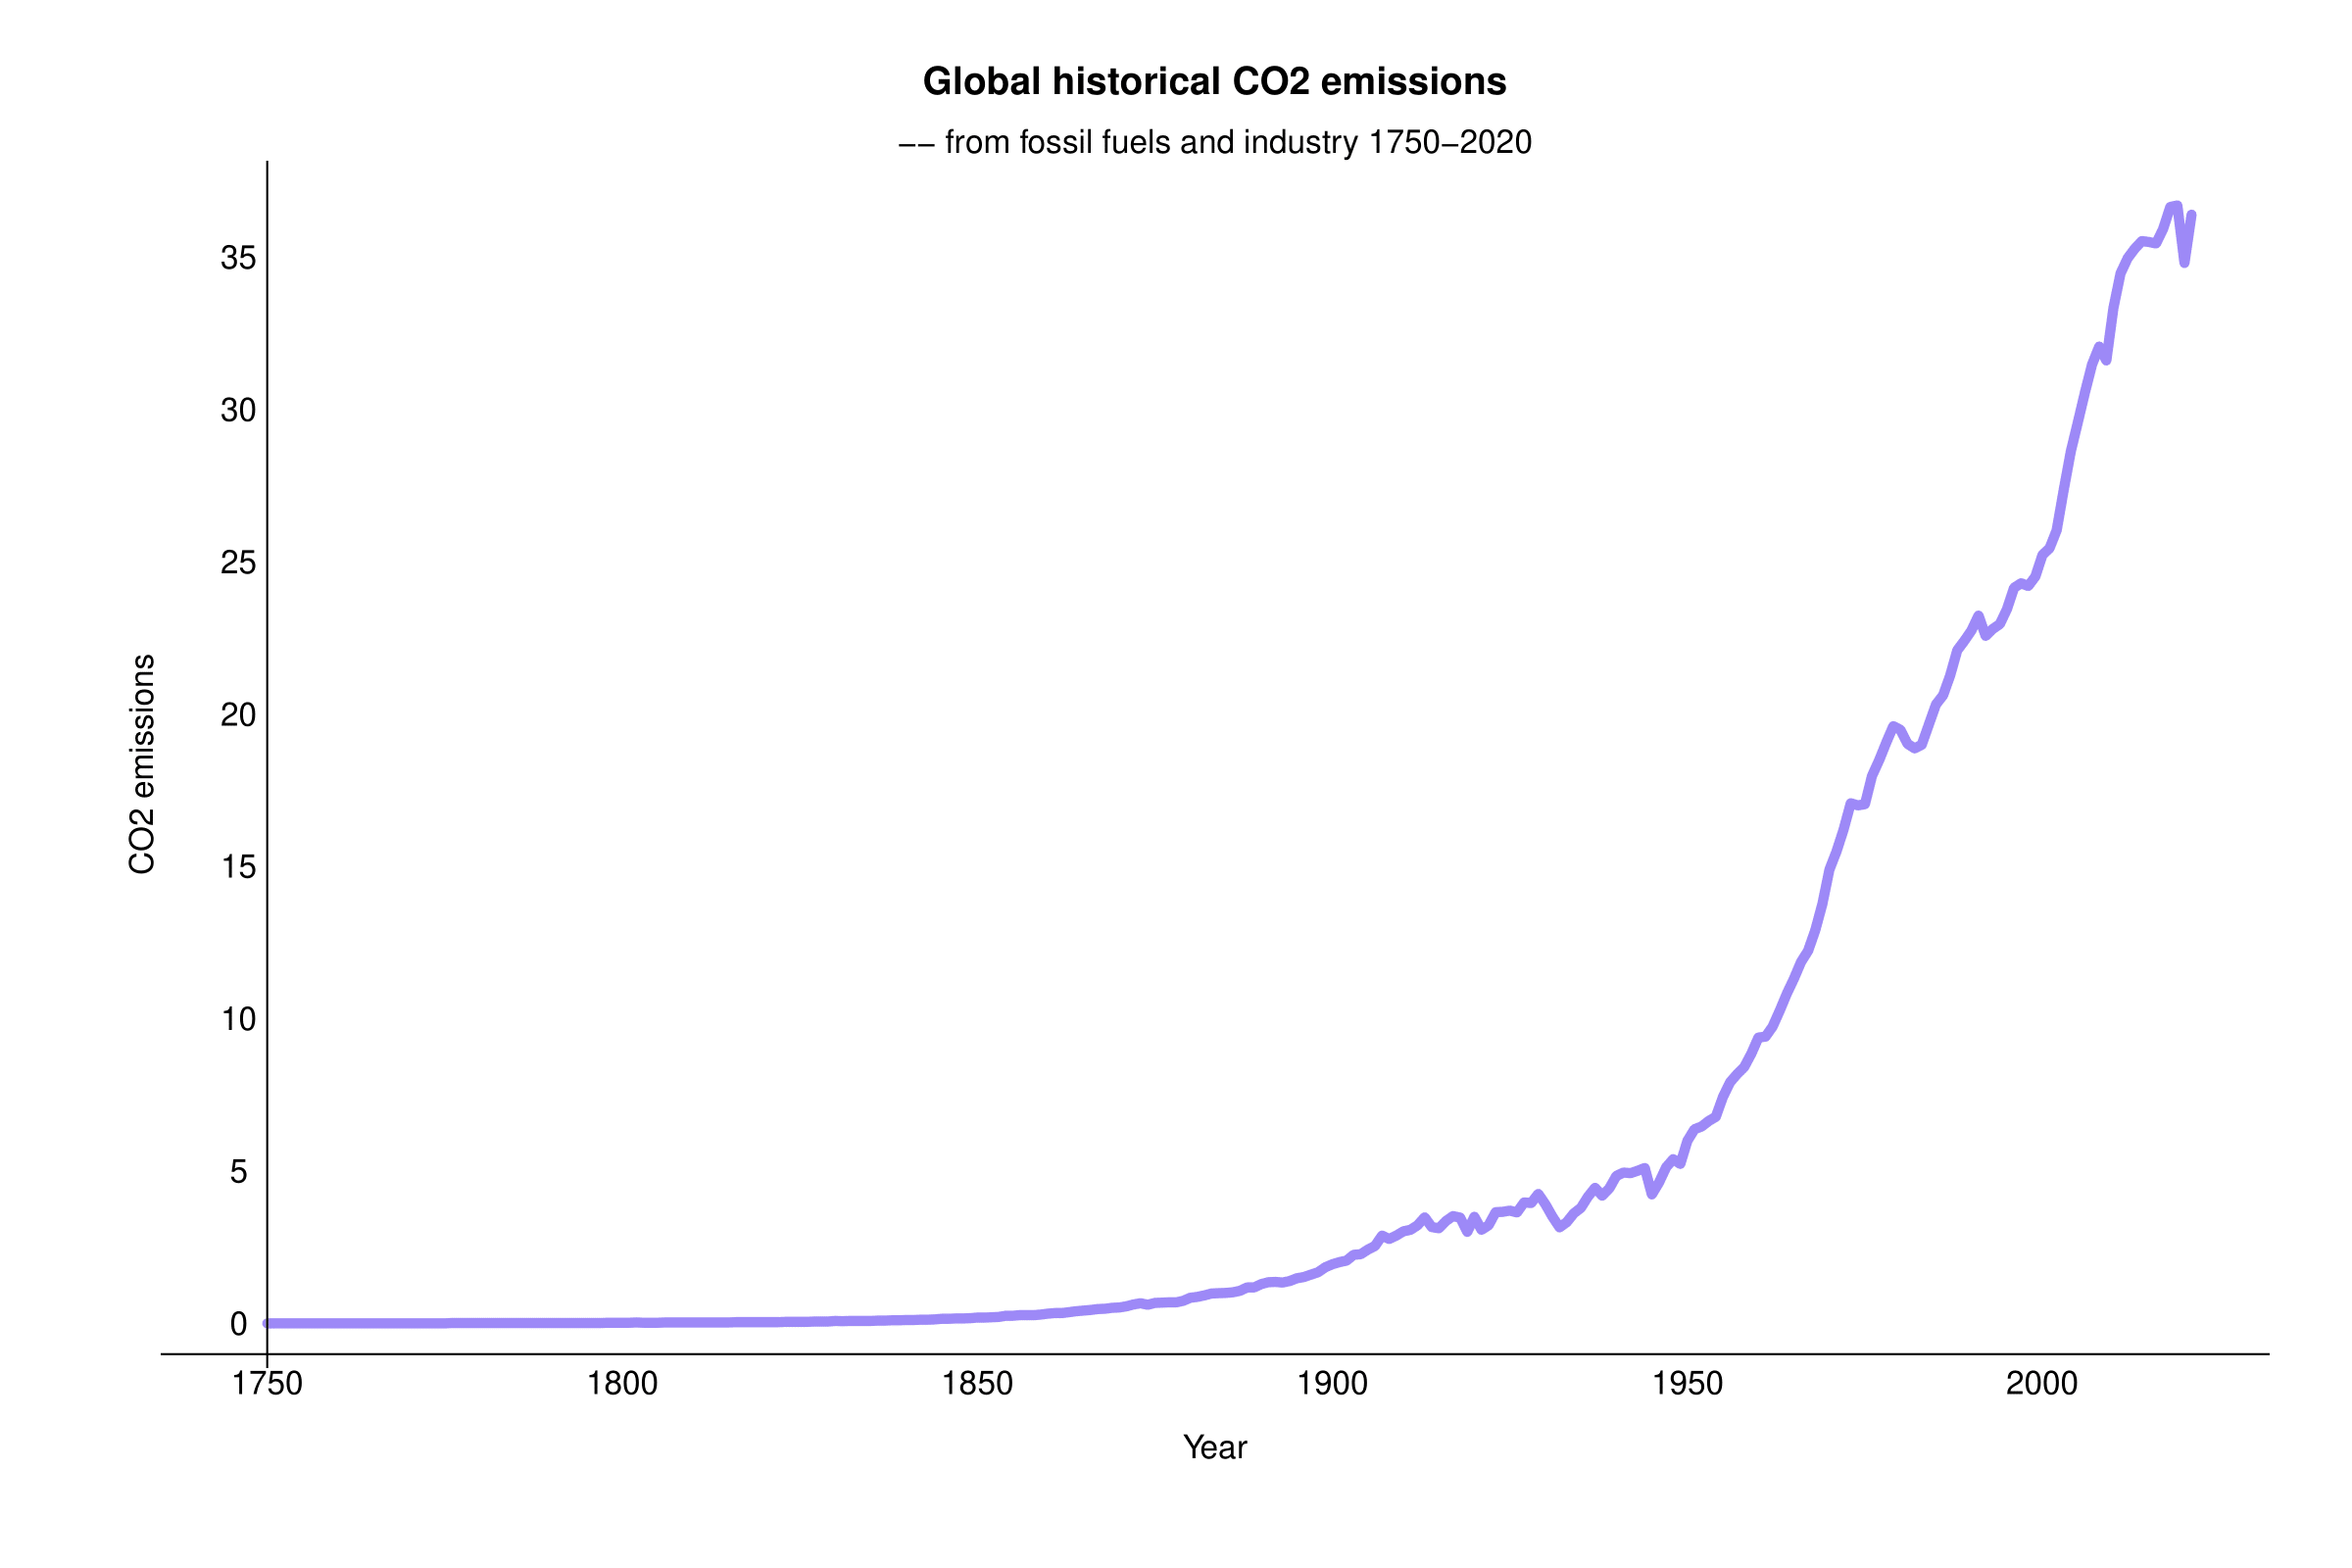

## Earth surface temperature data

### GlobalTemperatures

In [372]:
d <- read.csv(paste0(path, 'Earth surface temperature data/GlobalTemperatures.csv'))
dim(d)
head(d,2)

[1] 3192    9

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1750-01-01,3.034,3.574,NA,NA,NA,NA,NA,NA
2,1750-02-01,3.083,3.702,NA,NA,NA,NA,NA,NA


In [373]:
d$dt <- as.Date(d$dt)
# removeing NA
d <- d[-which(is.na(d[,2])),]
# averaging data by years
dy <- aggregate(d, list(lubridate::year(d$dt)), FUN=mean)

In [374]:
pdf(paste0(fig_path, 'Global Land and Ocean-and-Land Temperatures.PDF'), 
    width = 12, height = 8)
plot.new()
ylim <- c(range(dy[,-(1:2)], na.rm = TRUE)[1]-0.8, 
          range(dy[,-(1:2)], na.rm = TRUE)[2]+6)
xlim <- c(range(dy[,1])[1]-4, range(dy[,1])[2])

plot.window(xlim = xlim, ylim = ylim)
l <- seq(3,9,by=2)
cols <- c('#4d4dff','#f7d344','#a5e49b','#d63ac9')
for (i in 1:4)
lines(dy[,1], dy[,l[i]], col=cols[i], lwd=2)  # average

# adding 95% confidence interval
polygon(c(dy[,1], rev(dy[,1])), c(dy[,3]-dy[,4], rev(dy[,3]+dy[,4])),
        col='#9d8af635', lty=0)
polygon(c(dy[,1], rev(dy[,1])), c(dy[,5]-dy[,6], rev(dy[,5]+dy[,6])),
        col='#f7d34435', lty=0)
polygon(c(dy[,1], rev(dy[,1])), c(dy[,7]-dy[,8], rev(dy[,7]+dy[,8])),
        col='#a5e49b45', lty=0)
polygon(c(dy[,1], rev(dy[,1])), c(dy[,9]-dy[,10], rev(dy[,9]+dy[,10])),
        col='#d63ac950', lty=0)

abline(h=-0.6)
abline(v=1749)
text(seq(1765,2015,by=50), rep(0,6)-1.2, seq(1765,2015,by=50))
text(rep(1744,l=9), seq(0,16,by=2), seq(0,16,by=2))

labels <- c('Land Average Temperature', 'Land Max Temperature', 
            'Land Min Temperature', 'Land And Ocean Average Temperature')
legend(1750, 22.6, legend=labels, lty=1, col=cols, lwd=1.8, box.lwd=0)
title(main='Global Land and Ocean-and-Land Temperatures')
mtext('Year', side=1, line=0.3)
mtext('Temperature (\u00B0C)', side=2, line=0)
dev.off()

png 
  2

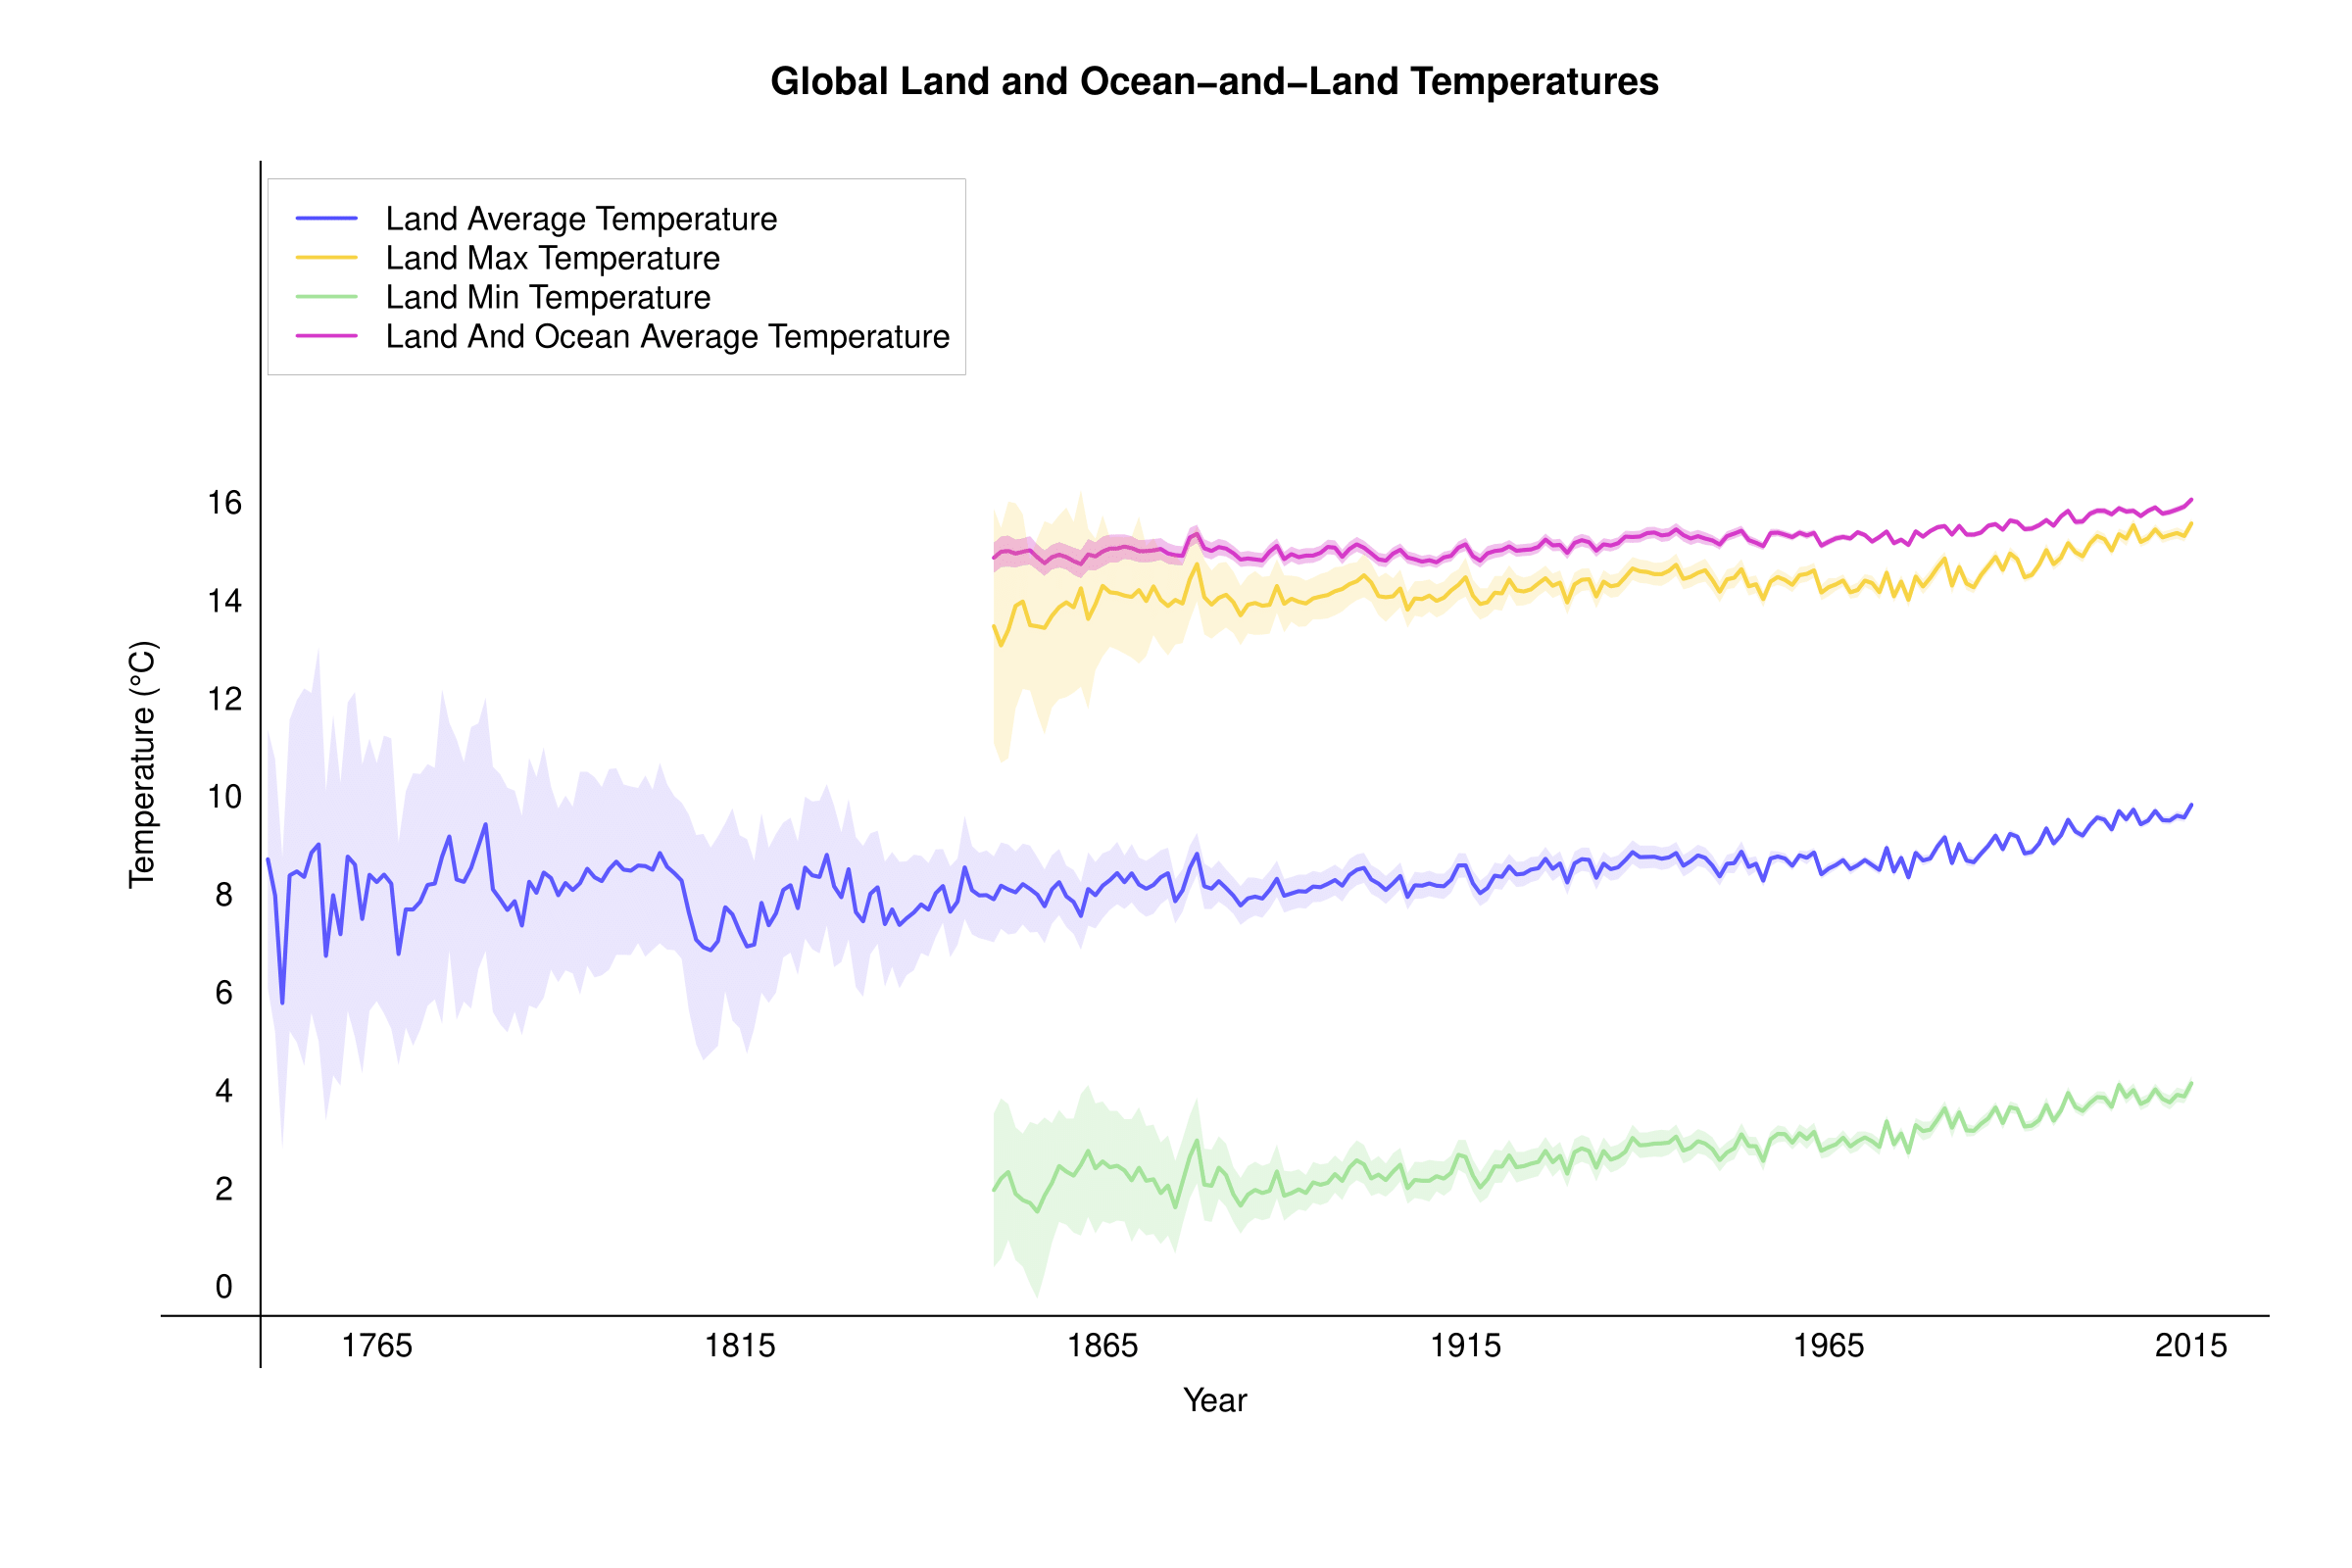

### GlobalLandTemperaturesByCountry

In [375]:
d <- read.csv(paste0(path, 'Earth surface temperature data/GlobalLandTemperaturesByCountry.csv'))
d$dt <- as.Date(d$dt)
dim(d)
head(d,2)

[1] 577462      4

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
,<date>,<dbl>,<dbl>,<chr>
1,1743-11-01,4.384,2.294,Åland
2,1743-12-01,NA,NA,Åland


In [376]:
# removeing NA
d <- d[-which(is.na(d[,2])),]
# the number of countries
length(unique(d$Country))

# here we chose the latest year '2013' from the data set
d2013 <- d[which(lubridate::year(d$dt) == max(lubridate::year(d$dt))),]
a <- aggregate(d2013[,2], list(d2013[,4]), mean)
colnames(a) <- c('Country','Global Average Temperature')

library(rworldmap)
map <- joinCountryData2Map(a, joinCode = "NAME", nameJoinColumn = "Country")

[1] 242

210 codes from your data successfully matched countries in the map
32 codes from your data failed to match with a country code in the map
33 codes from the map weren't represented in your data


In [377]:
pdf(paste0(fig_path, 'Global Average Temperature.PDF'), 
    width = 16, height = 8)
par(mar=c(0,0,1,0))
mapCountryData(map, nameColumnToPlot="Global Average Temperature",
               missingCountryCol=grey(0.5,0.1))
dev.off()

png 
  2

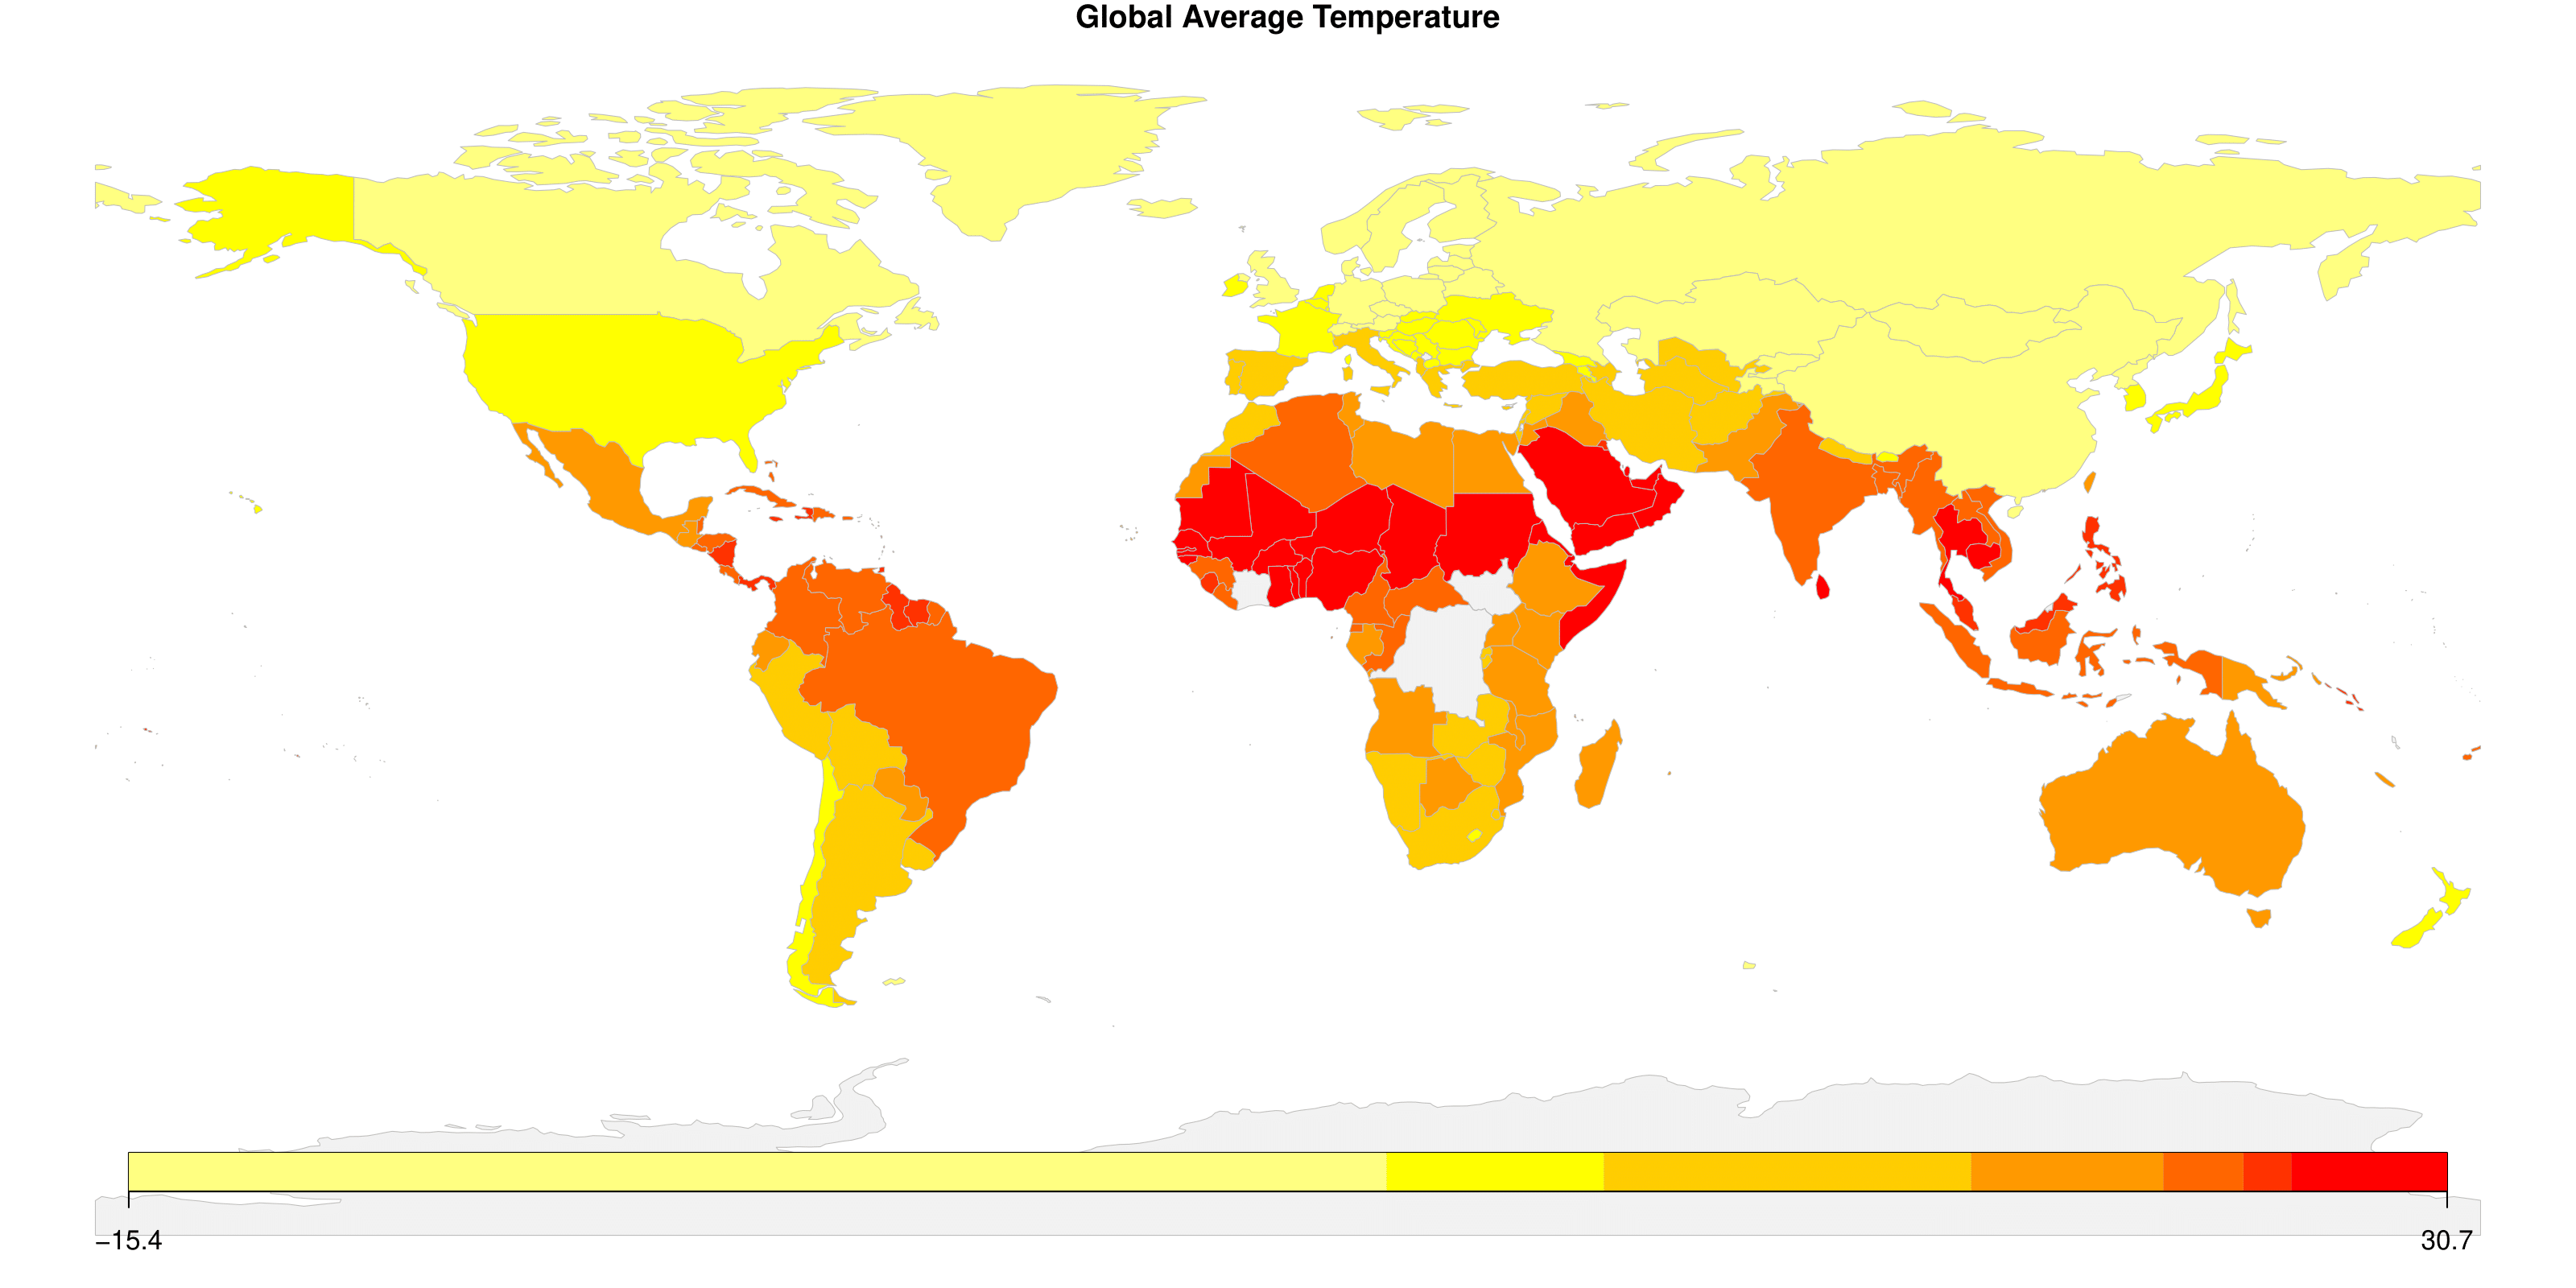

## Climate disasters

### Global-natural-disasters-1970-2021

In [378]:
d <- as.data.frame(readxl::read_excel(paste0(path, 
     'Climate disasters/Global-natural-disasters-1970-2021.xlsx'),
      range='A1:N14645'))
dim(d)
head(d,3)

[1] 14644    14

,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,Region,Continent,Location
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1970-0013-ARG,1970,13,Natural,Hydrological,Flood,NA,NA,NA,Argentina,ARG,South America,Americas,Mendoza
2,1970-0109-AUS,1970,109,Natural,Meteorological,Storm,Tropical cyclone,NA,Ada,Australia,AUS,Australia and New Zealand,Oceania,Queensland
3,1970-0044-BEN,1970,44,Natural,Hydrological,Flood,NA,NA,NA,Benin,BEN,Western Africa,Africa,Atacora region


In [379]:
dc <- aggregate(d[,6], list(d$Year), length)

pdf(paste0(fig_path, 'The number of Disasters (Yearly).PDF'), 
    width = 12, height = 8)
plot.new()
xlim = c(range(dc[,1])[1]-4, range(dc[,1])[2])
ylim = c(range(dc[,2])[1]-12, range(dc[,2])[2]+20)
plot.window(xlim = xlim, ylim = ylim)

lines(dc[,1], dc[,2], col='#9d8af6', lwd=5, type='b', pch=19, cex=0.8)
text(rep(1967,9), seq(80,560, by=60), seq(80,560, by=60))
text(seq(1970,2020,by=10), rep(36,5), seq(1970,2020,by=10))
abline(h = 50)
abline(v = 1968)

title(main='The number of Disasters (Yearly)')
mtext('Year', side=1, line=0.6)
mtext('The number of Disasters', side=2, line=-1)
dev.off()

png 
  2

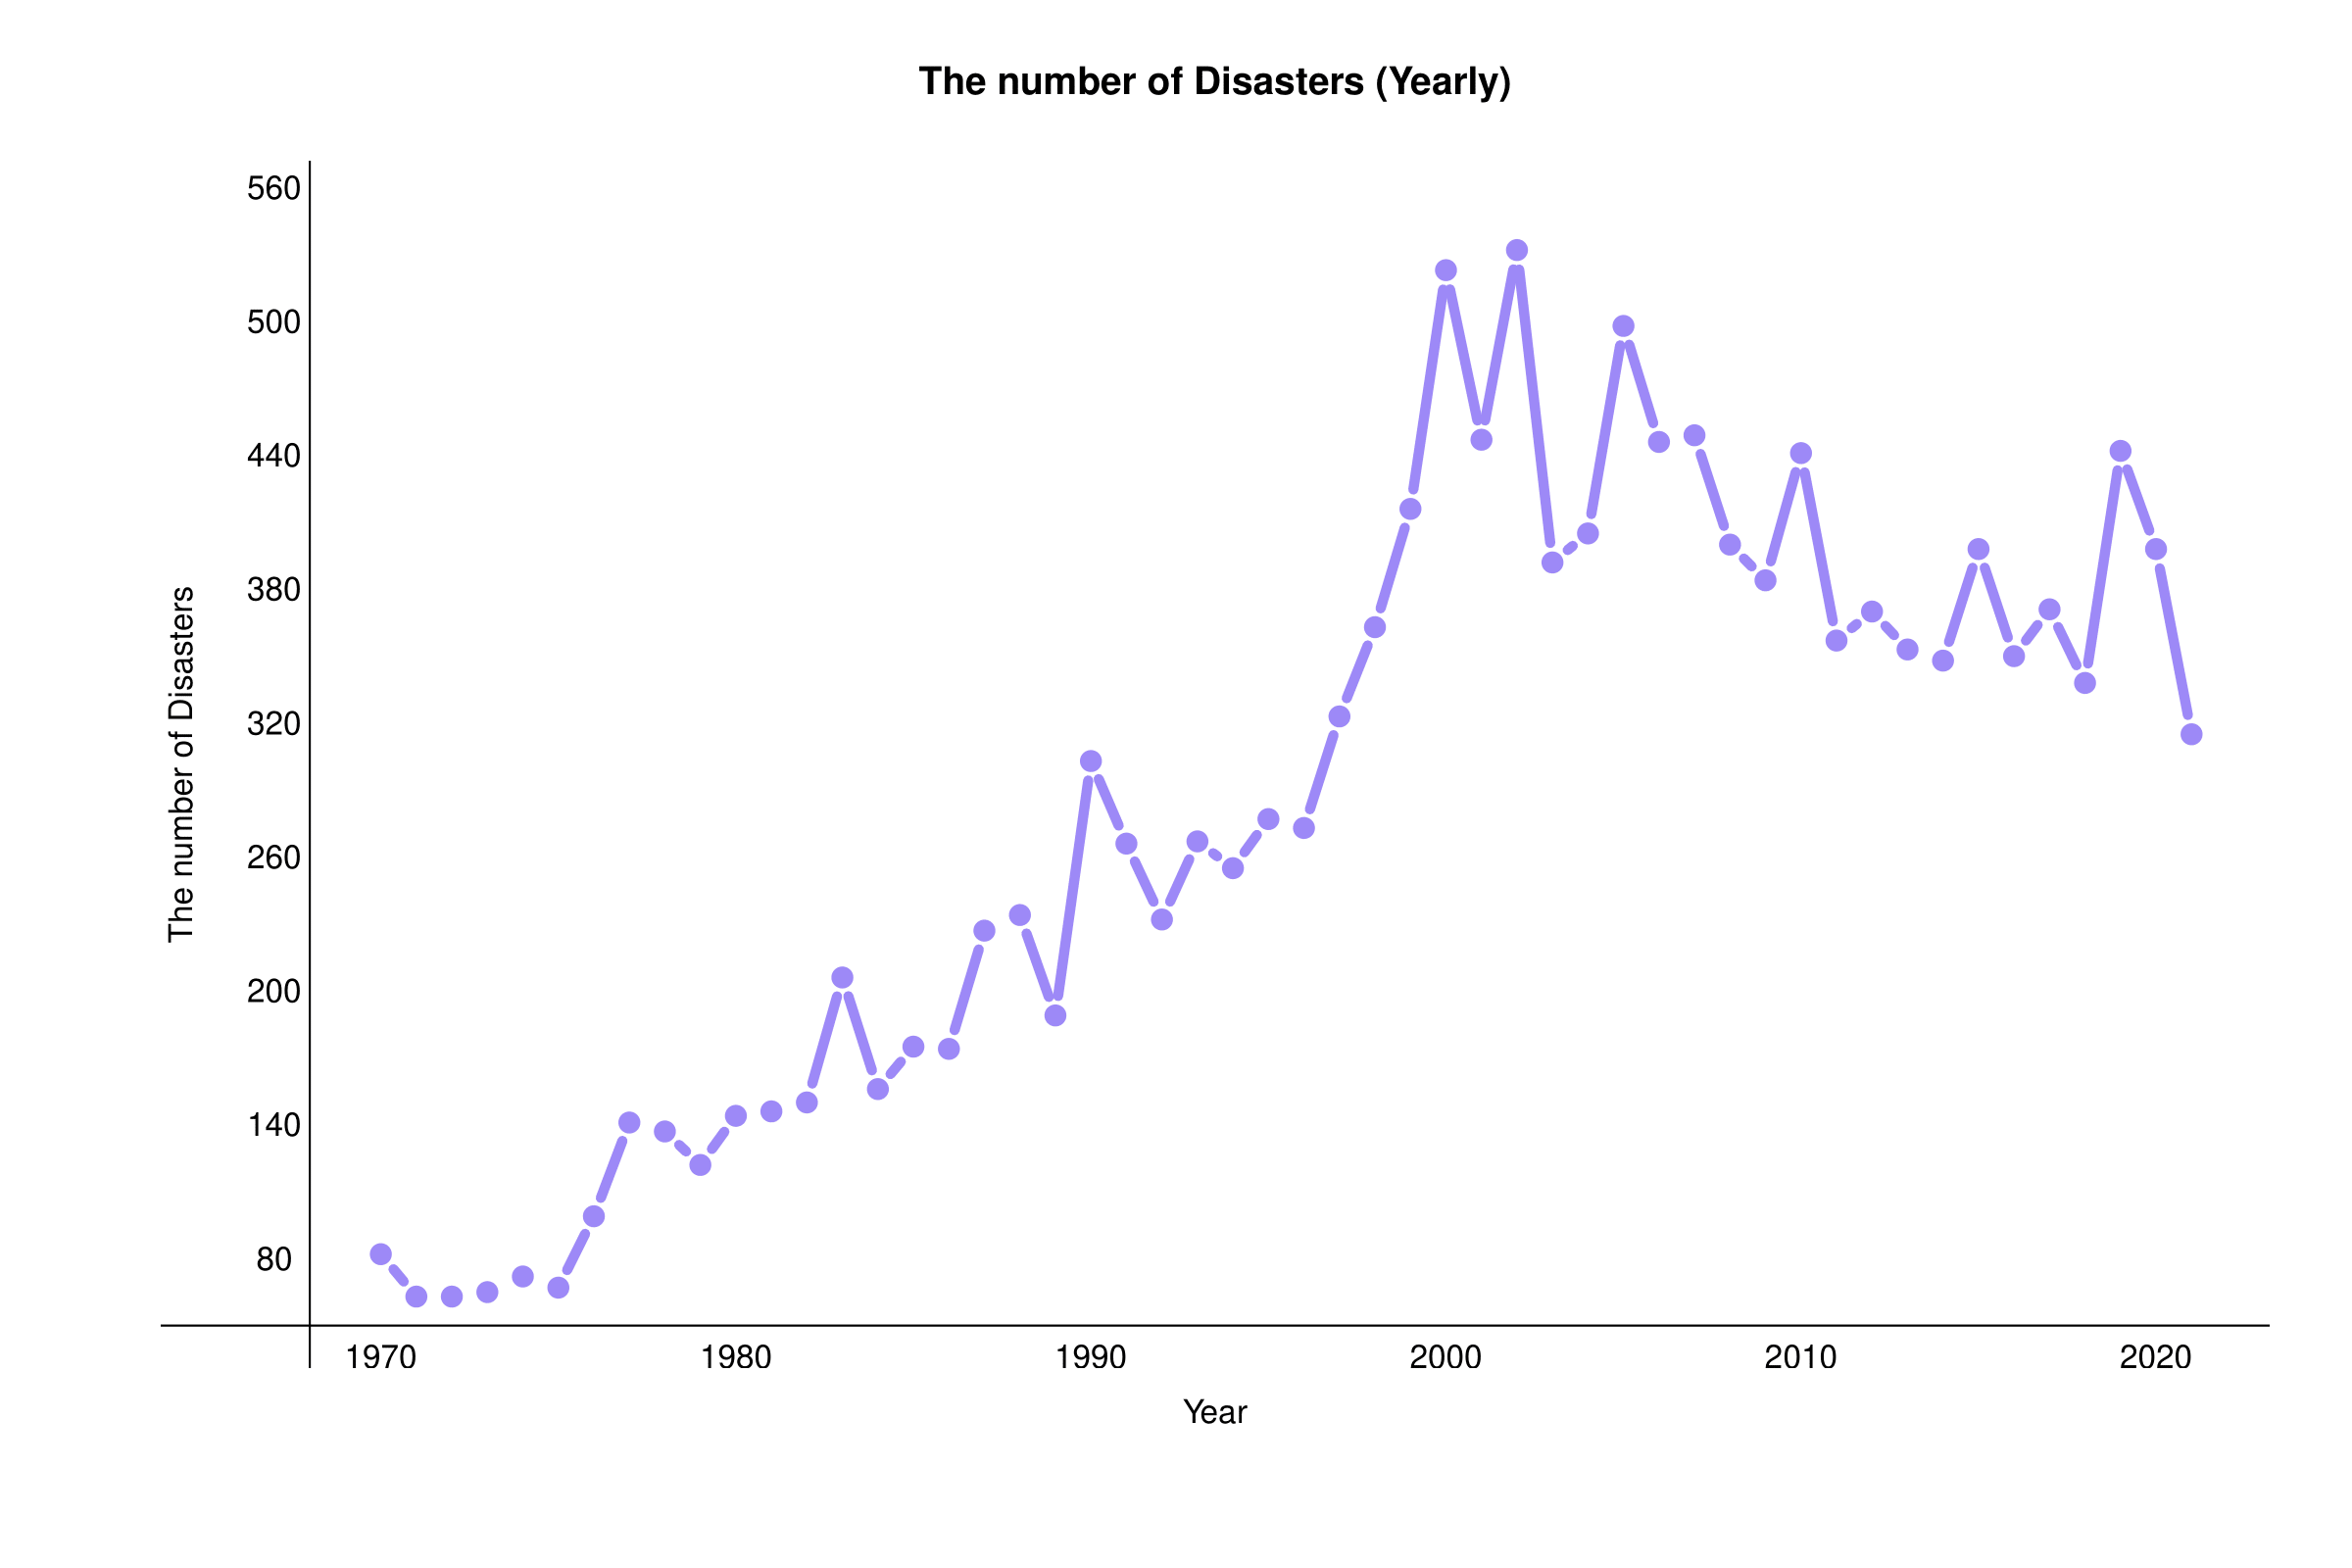

In [380]:
s <- split(d, d[,6])
o <- data.frame(matrix(1970:2021))
colnames(o) <- 'Group.1'

for (i in 1:length(s)){
    r <- aggregate(s[[i]][,6], list(s[[i]]$Year), length)
    colnames(r)[2] <- names(s)[i]
    o <- merge(o,r, by='Group.1', all=TRUE)
}

o[is.na(o)] <- 0
#o <- cbind(o[,1],cumsum(o[,2:15]))
colnames(o)[1] <- 'Year'
dim(o)

df <- data.frame(matrix(0, nc=3, nr=dim(o)[1] * 14))
colnames(df) <- c('Year', 'Disaster_Type', 'Count')

df[,1] <- rep(1970:2021, each=14)
df[,2] <- rep(names(s), 2021-1970+1)
df[,3] <- c(t(apply(o, 2, function(x) as.numeric(x))[,2:15]))

[1] 52 15

In [381]:
library(gcookbook) 
library(ggplot2)
pdf(paste0(fig_path, 'Changes in Different Disaster Types over Time.PDF'), 
    width = 12, height = 8)

ggplot(df, aes(x = Year, y = Count, fill = Disaster_Type)) +
  geom_area() +
ggtitle("Changes in Different Disaster Types over Time") + 
scale_y_discrete(limits=seq(0,500,by=100)) + 
theme(
     plot.title = element_text(size=16, hjust=0.5),
     axis.title.x = element_text(size=12, hjust=0.5), #hjust：设置label的水平位置
     axis.title.y = element_text(size=12, hjust=0.5),
     panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"),
    axis.text.x = element_text(size=10, color=1),
    axis.text.y = element_text(size=10, color=1))
dev.off()

Warning message:
“Continuous limits supplied to discrete scale.
Did you mean `limits = factor(...)` or `scale_*_continuous()`?”


png 
  2

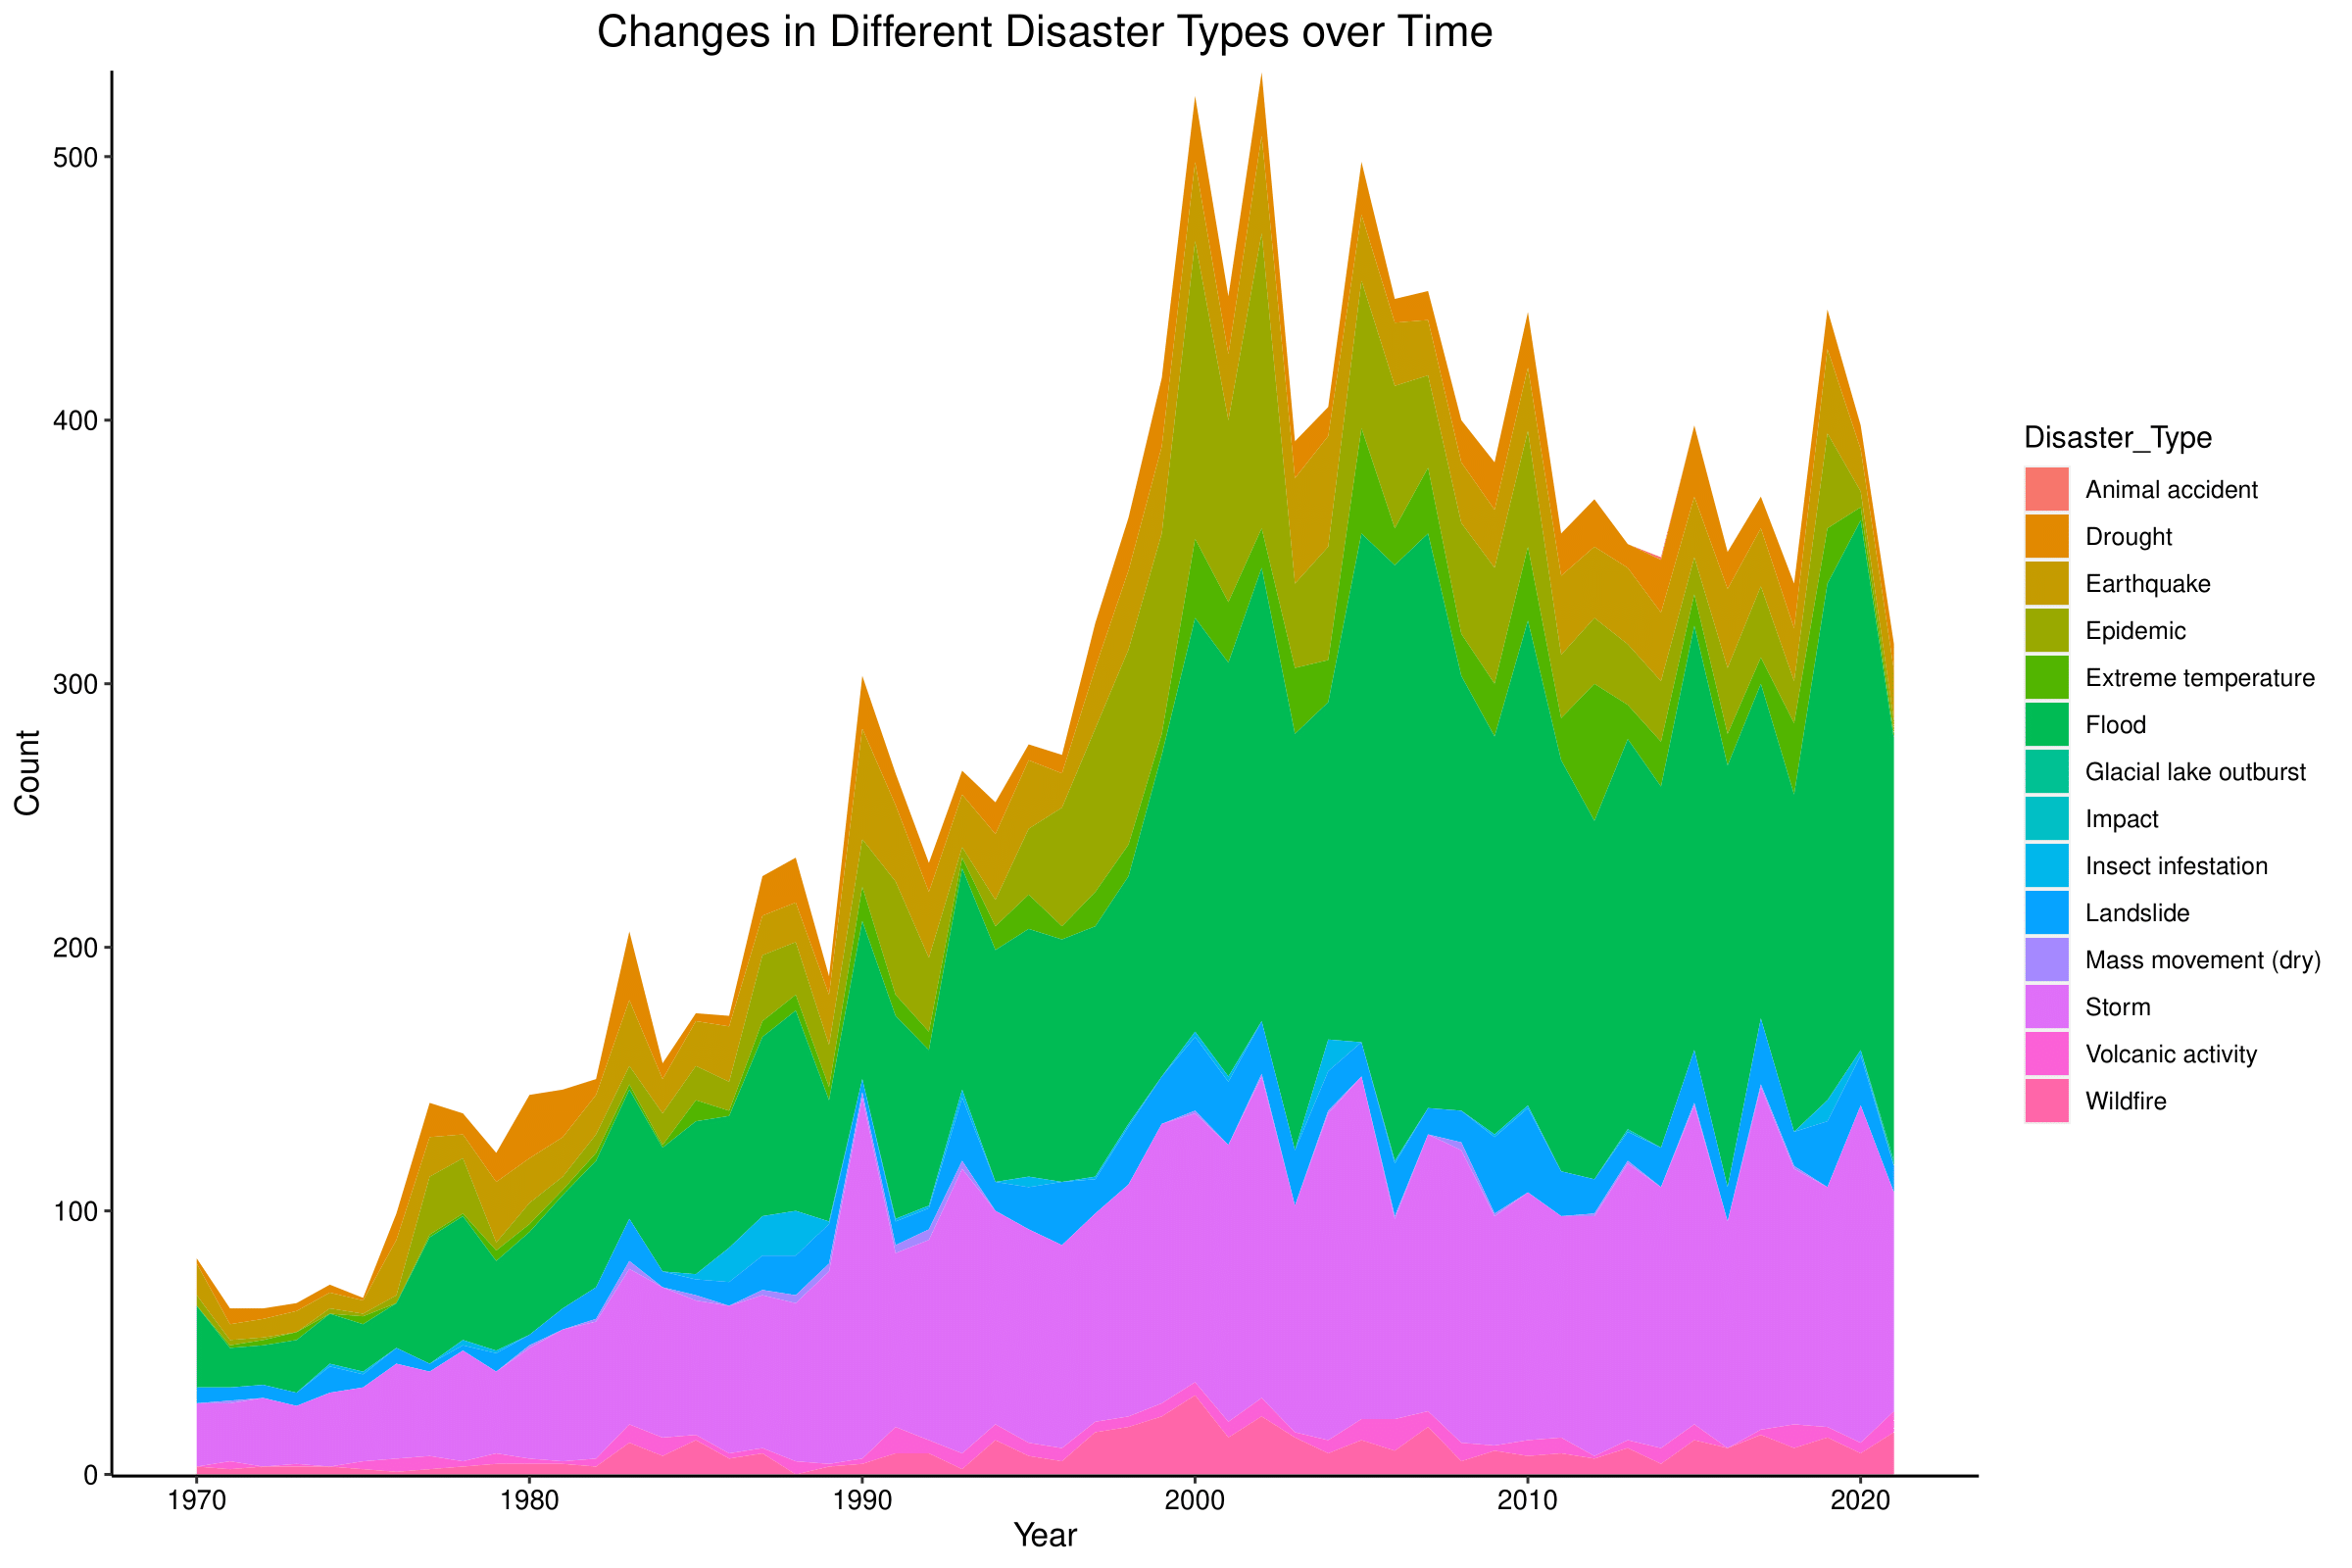

### Aggregated figures for Natural Disasters by country

In [382]:
d <- as.data.frame(readxl::read_excel(paste0(path, 
     'Climate disasters/Aggregated figures for Natural Disasters by country.xlsx')))
dim(d)
head(d,3)

[1] 10340    13

,Year,Country,ISO,Disaster Group,Disaster Subroup,Disaster Type,Disaster Subtype,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)","Total Damage (USD, adjusted)",CPI
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1900,Cabo Verde,CPV,Natural,Climatological,Drought,Drought,1,NA,11000,NA,NA,3.077091
2,1900,India,IND,Natural,Climatological,Drought,Drought,1,NA,1250000,NA,NA,3.077091
3,1900,Jamaica,JAM,Natural,Hydrological,Flood,NA,1,NA,300,NA,NA,3.077091


In [383]:
# as data in 2022 is incompleted, here we selected data in 2021
dn <- d[d$Year == '2021',]
a <- aggregate(dn[,8], list(dn$Country), sum)
colnames(a) <- c('Country','Disasters')

In [384]:
library(rworldmap)
map1 <- joinCountryData2Map(a, joinCode = "NAME", nameJoinColumn = "Country")

pdf(paste0(fig_path, 'Disasters (2021).PDF'), 
    width = 12, height = 12)
par(mar=c(0,0,3,0), mfrow=c(3,1))
mapCountryData(map1, nameColumnToPlot="Disasters", 
               colourPalette = "topo", mapTitle='The number of Disasters (2021)',
               numCats=2, missingCountryCol=grey(0.5,0.1))

dn3 <- dn[-which(is.na(dn[,9])),]
c <- aggregate(dn3[,9], list(dn3$Country), sum)
colnames(c) <- c('Country','Affected')

cols <- c('#ffffd4', '#fee391', '#fec44f', '#fe9929', 
          '#ec7014', '#cc4c02', '#8c2d04')
map3 <- joinCountryData2Map(c, joinCode = "NAME", nameJoinColumn = "Country")
mapCountryData(map3, nameColumnToPlot="Affected", 
               colourPalette = cols,
               mapTitle='Total Affected of Disasters (2021)',
               missingCountryCol=grey(0.5,0.1))

dn2 <- dn[-which(is.na(dn[,10])),]
b <- aggregate(dn2[,10], list(dn2$Country), sum)
colnames(b) <- c('Country','Deaths')
map2 <- joinCountryData2Map(b, joinCode = "NAME", nameJoinColumn = "Country")
mapCountryData(map2, nameColumnToPlot="Deaths", colourPalette = "white2Black",
                mapTitle='The Number of Deaths in Disasters (2021)',
                missingCountryCol='white')
dev.off()

108 codes from your data successfully matched countries in the map
19 codes from your data failed to match with a country code in the map
135 codes from the map weren't represented in your data
101 codes from your data successfully matched countries in the map
16 codes from your data failed to match with a country code in the map
142 codes from the map weren't represented in your data
80 codes from your data successfully matched countries in the map
14 codes from your data failed to match with a country code in the map
163 codes from the map weren't represented in your data


png 
  2

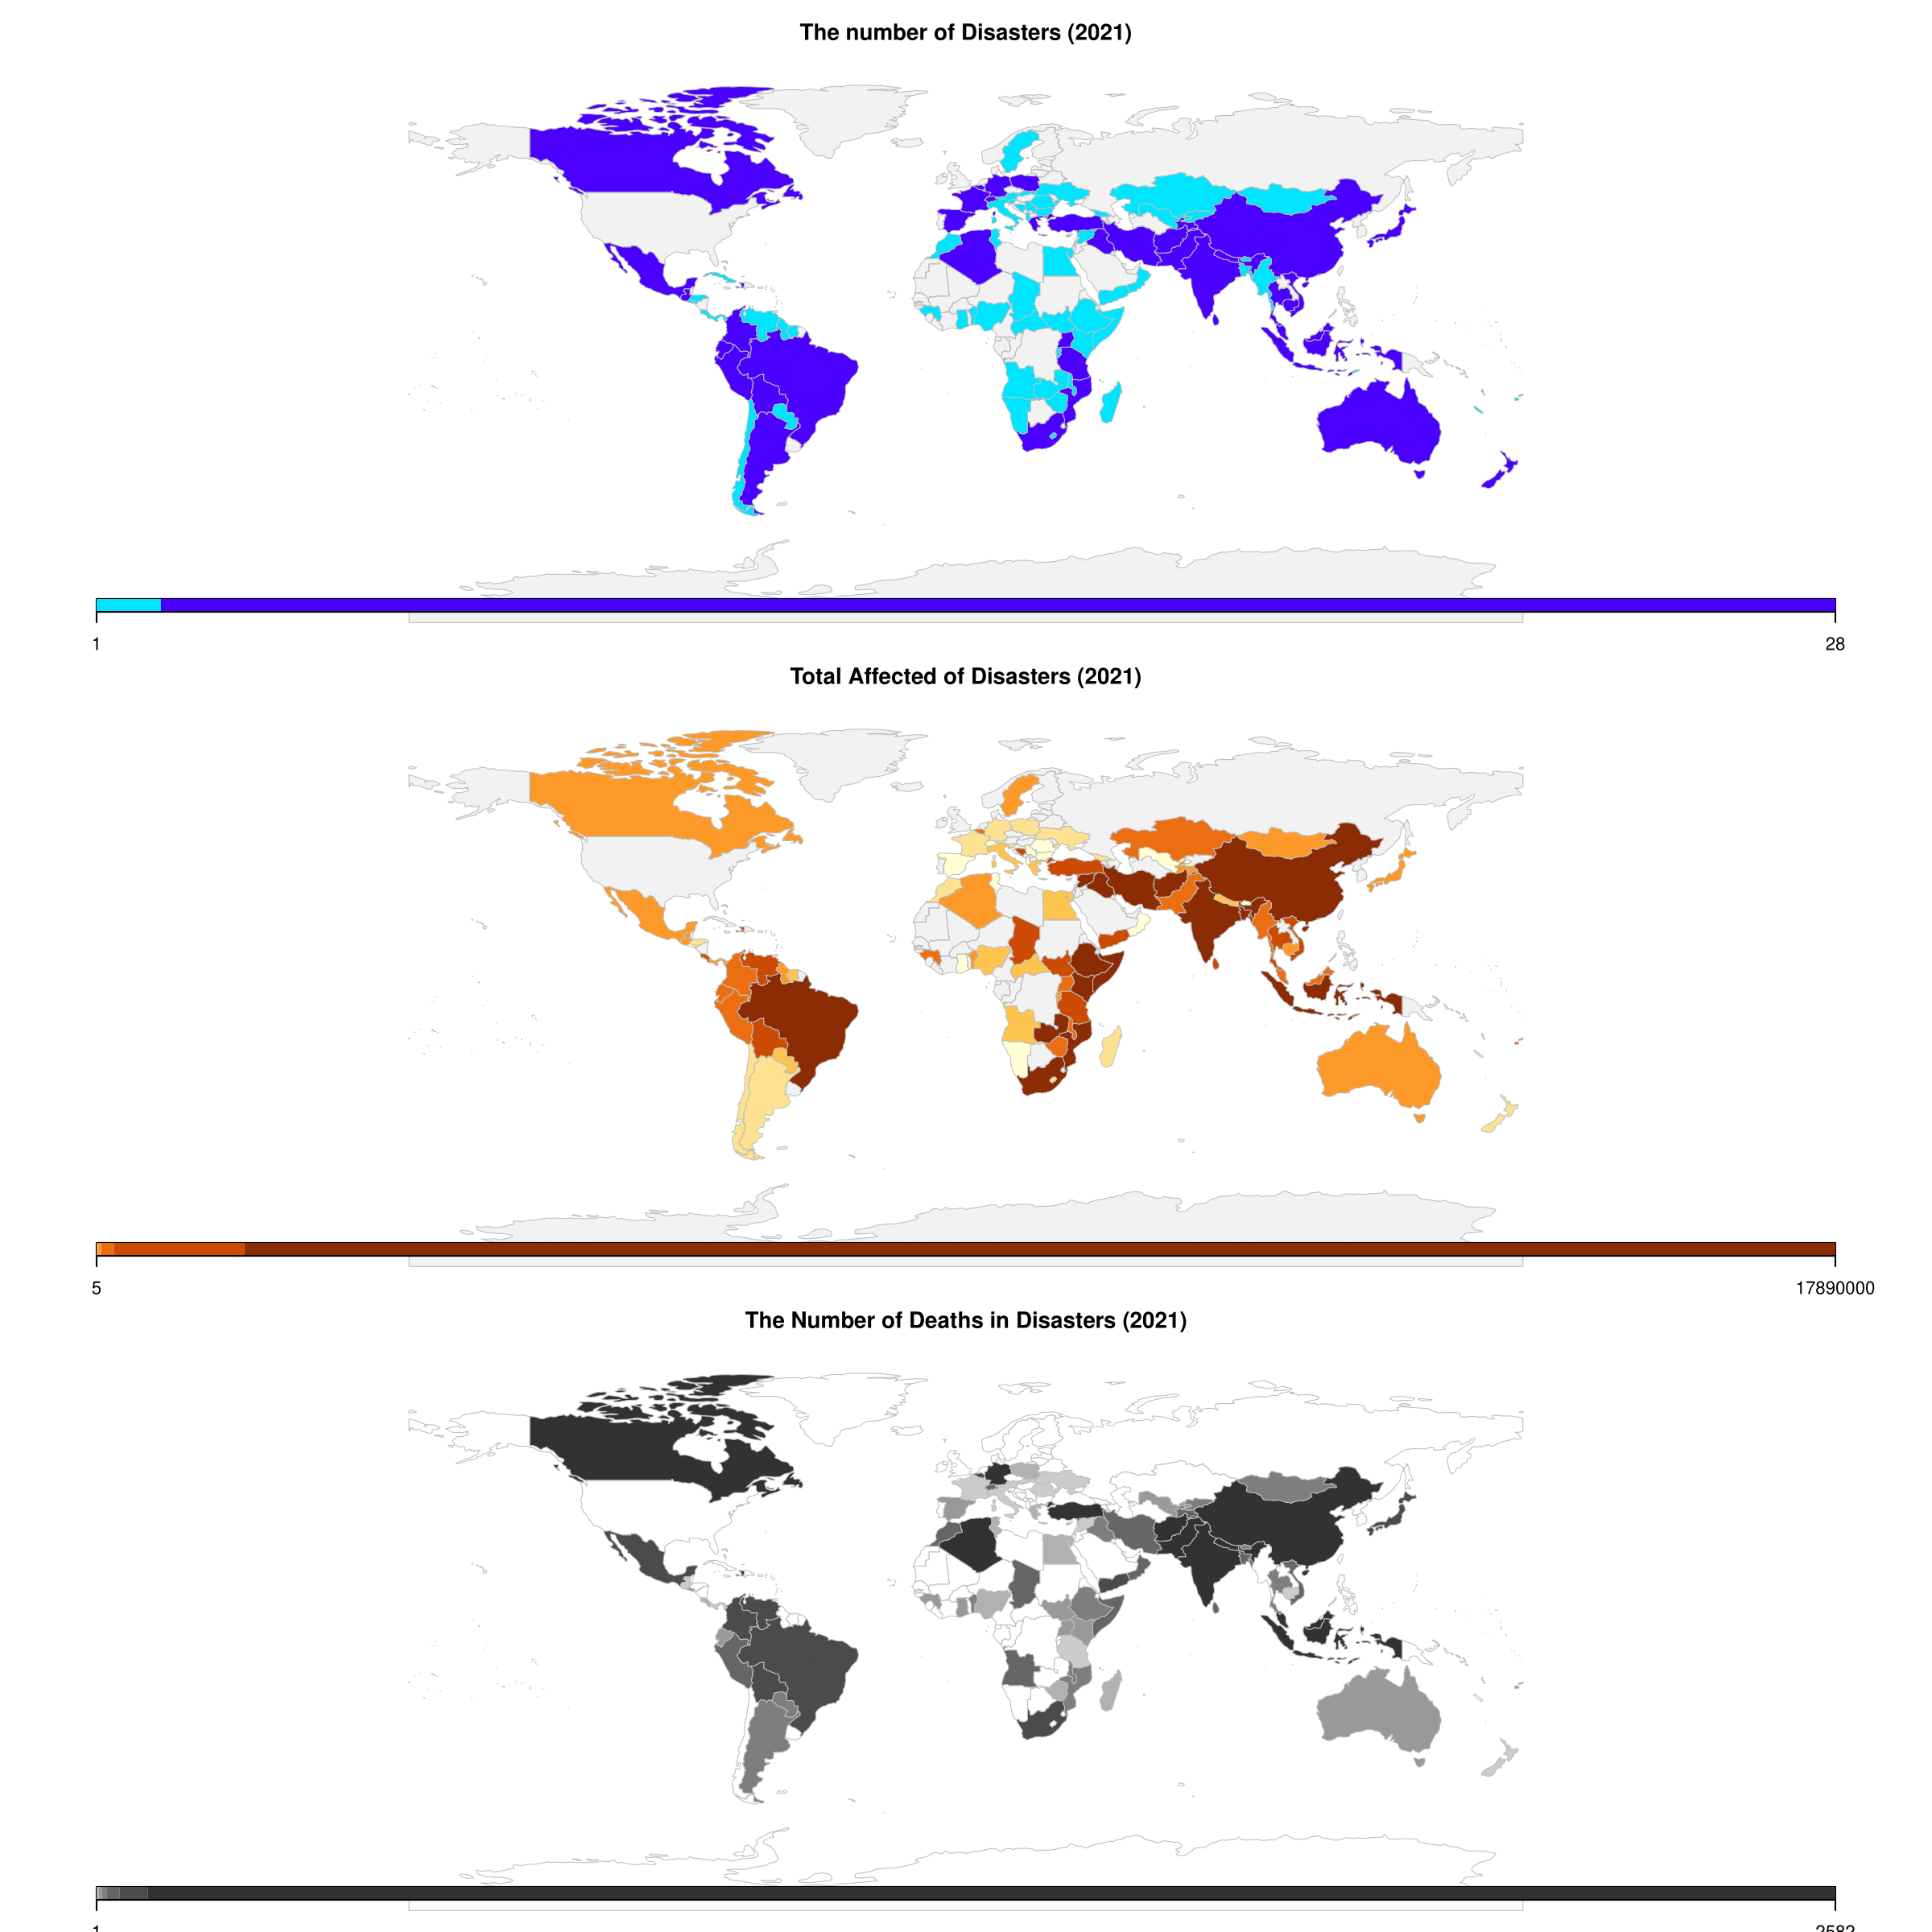

### Forest area (_ of land area)

In [385]:
d <- as.data.frame(readxl::read_excel(paste0(path, 
     'Climate disasters/Forest area (_ of land area).xlsx'),
     range='A4:BM270'))
dim(d)
head(d,2)

[1] 266  65

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,⋯,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Aruba,ABW,Forest area (% of land area),AG.LND.FRST.ZS,NA,NA,NA,NA,NA,NA,⋯,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333
2,Africa Eastern and Southern,AFE,Forest area (% of land area),AG.LND.FRST.ZS,NA,NA,NA,NA,NA,NA,⋯,32.370921,31.890583,31.680565,31.470564,31.260350,31.039613,30.824248,30.611444,30.391558,30.174186


In [386]:
s <- d[,c(1,65)]
cols <- c('#ffffcc','#d9f0a3','#addd8e','#78c679','#41ab5d','#238443','#005a32')
pdf(paste0(fig_path, 'Forest Area of Land Area (2020).PDF'), 
    width = 16, height = 8)
map <- joinCountryData2Map(s, joinCode = "NAME", nameJoinColumn = "Country Name")
mapCountryData(map, nameColumnToPlot="2020", 
               colourPalette = cols,
               mapTitle='Forest Area of Land Area (2020)',
               missingCountryCol=grey(0.5,0.1))
dev.off()

205 codes from your data successfully matched countries in the map
61 codes from your data failed to match with a country code in the map
38 codes from the map weren't represented in your data


png 
  2

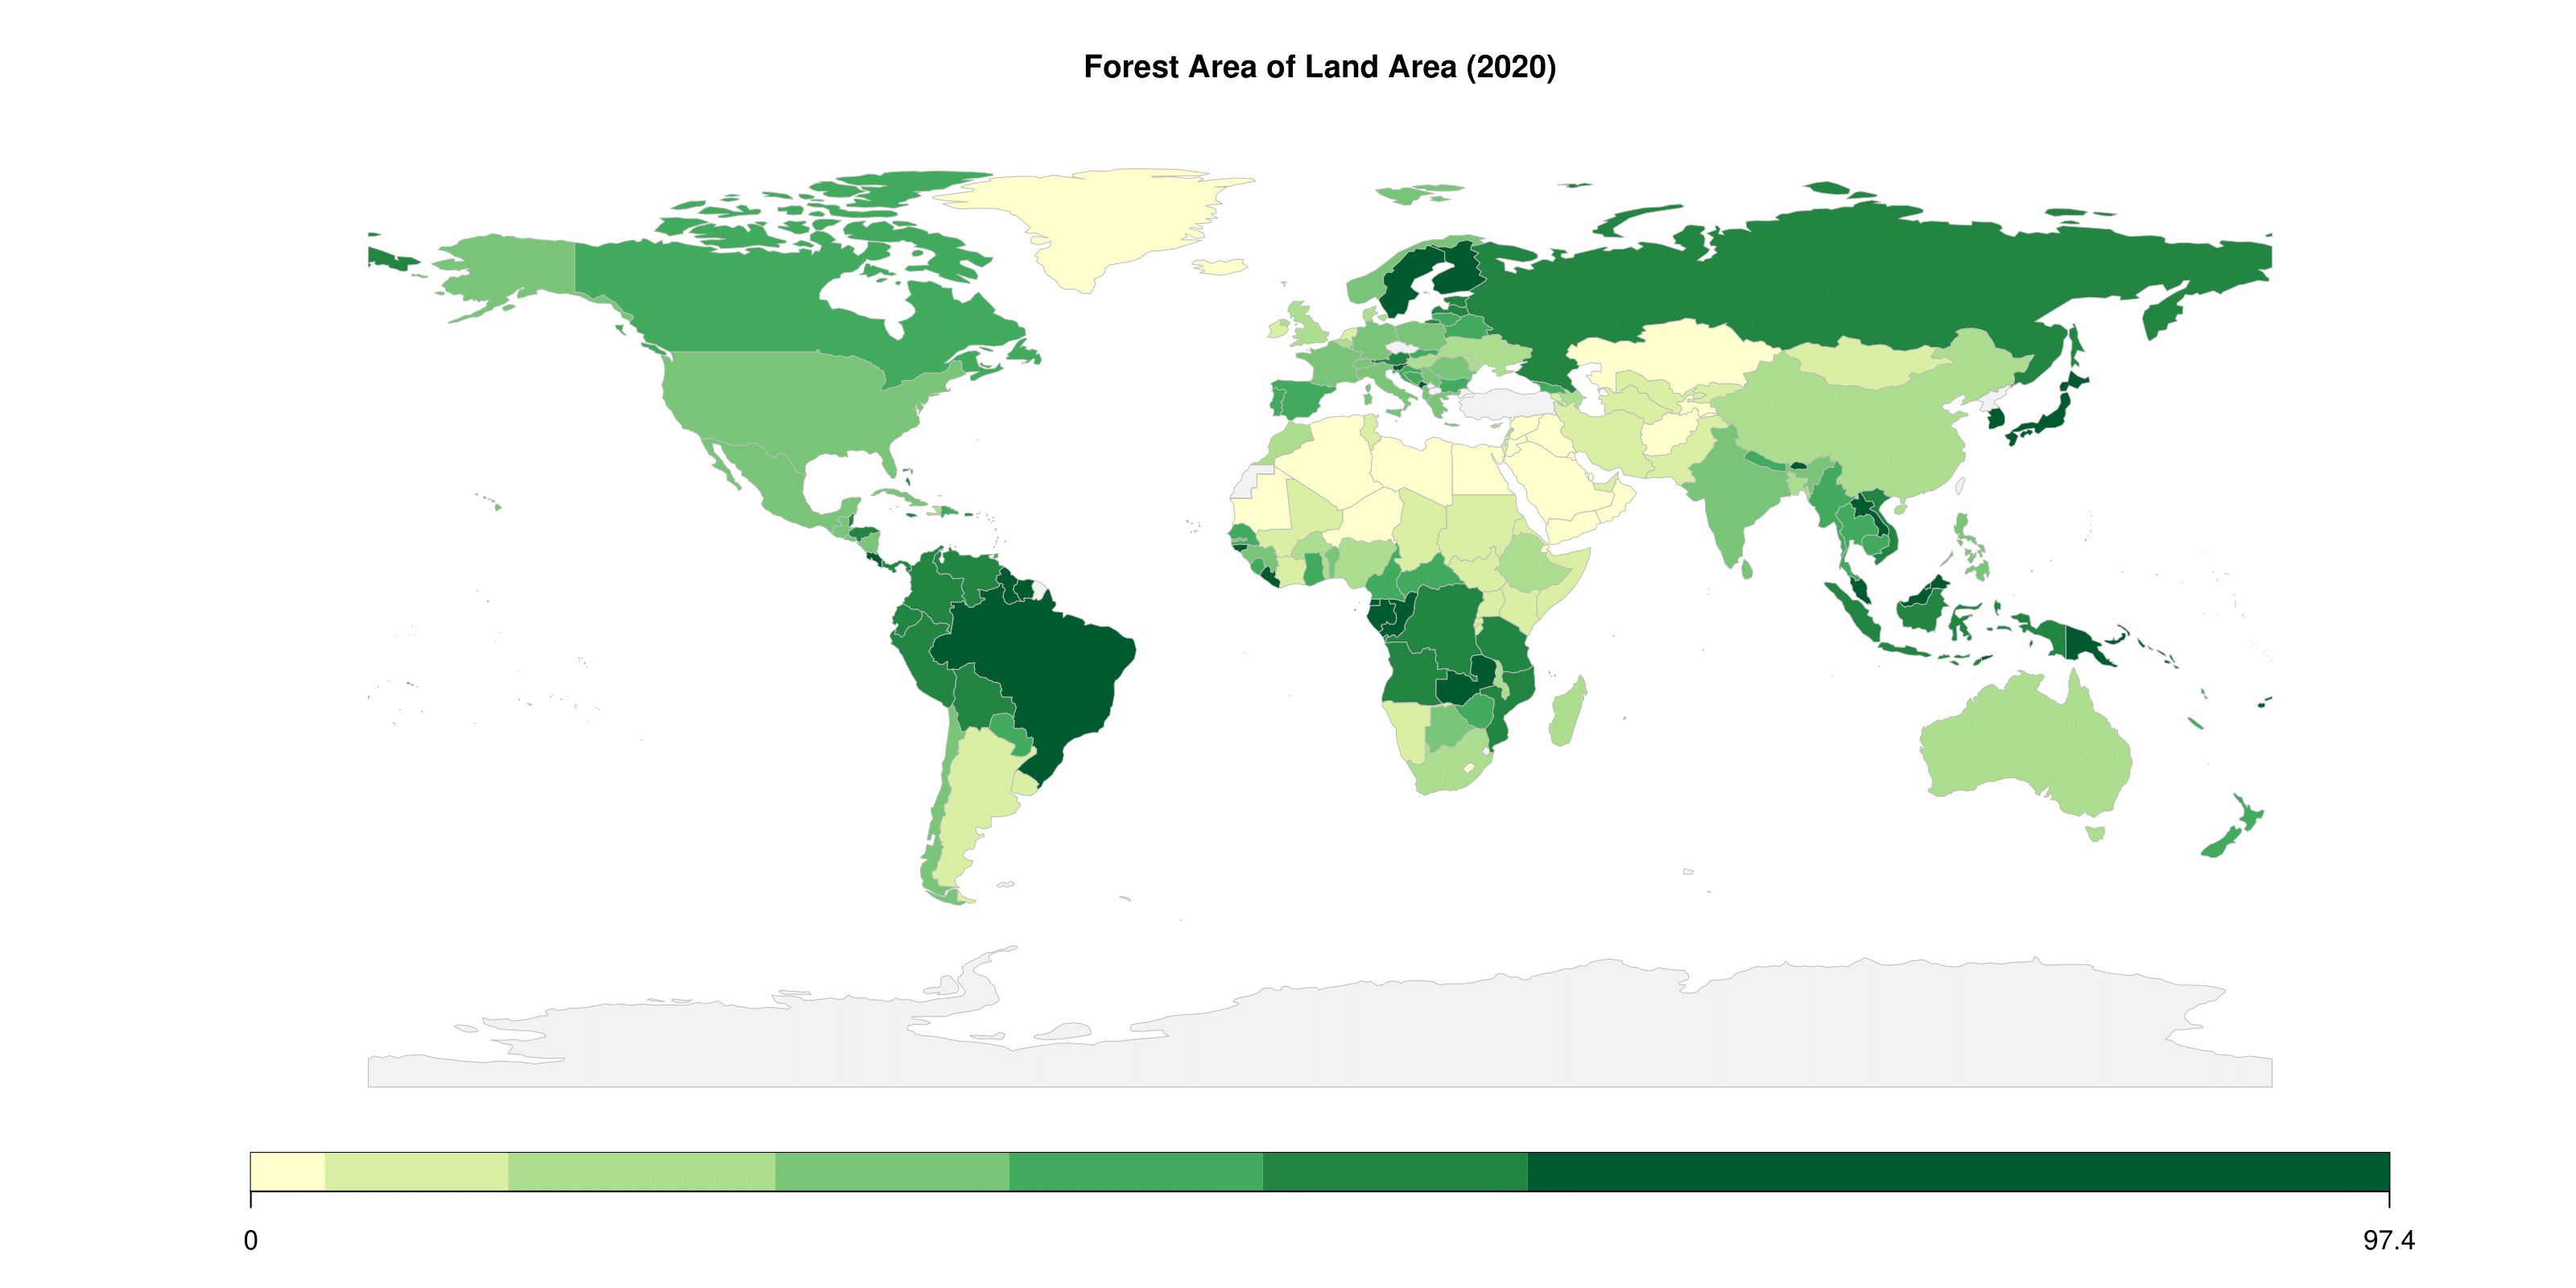

## Carbon emissions

### CO2 emissions by region from 1965 to 2021

In [387]:
d <- as.data.frame(readxl::read_excel(paste0(path, 
     'Carbon emissions/CO2 emissions by region from 1965 to 2021.xlsx'),
     sheet='Data', range='B5:I26'))
d[,1] <- as.numeric(d[,1])
dim(d)
head(d,2)

[1] 21  8

,Year,Asia Pacific,North America,Europe,Middle East,Commonwealth of Independent States,Africa,South & Central America
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1965,1431,3774,3428,137,1919,194,306
2,1970,2235,4701,4226,172,2337,230,391


In [388]:
y <- seq(1970, 2020, by=10)
e <- d[which(d[,1] %in% y),]
a <- apply(e[,-1], 1, function(x) x/sum(x))
colnames(a) <- y
a <- formattable::percent(a,0)

In [389]:
i <- 6
df <- as.data.frame(a[,i])
colnames(df) <- 'emissions'
df$region <- rownames(df)
rownames(df) <- NULL

In [359]:
library(ggplot2)
library(dplyr)
# Hole size
hsize <- 2

p6 <- ggplot(df, aes(x = hsize, y = emissions, fill = region)) +
  geom_col(color = "black") +
  geom_text(aes(label = emissions),
             position = position_stack(vjust = 0.5)) +
  coord_polar(theta = "y") +
  ggtitle(paste0('CO2 Emissions (', colnames(a)[i], ')')) +
  xlim(c(0.2, hsize + 0.5)) +
  theme(plot.title = element_text(size=12, hjust=0.5),
        panel.background = element_rect(fill = "white"),
        panel.grid = element_blank(),
        axis.title = element_blank(),
        axis.ticks = element_blank(),
        axis.text = element_blank())

In [363]:
library(patchwork)
library(gtable)
pdf(paste0(fig_path, 'Changes.PDF'), 
    width = 24, height = 14)
p1 + p2 + p3 + p4 + p5 + p6
dev.off()

png 
  2

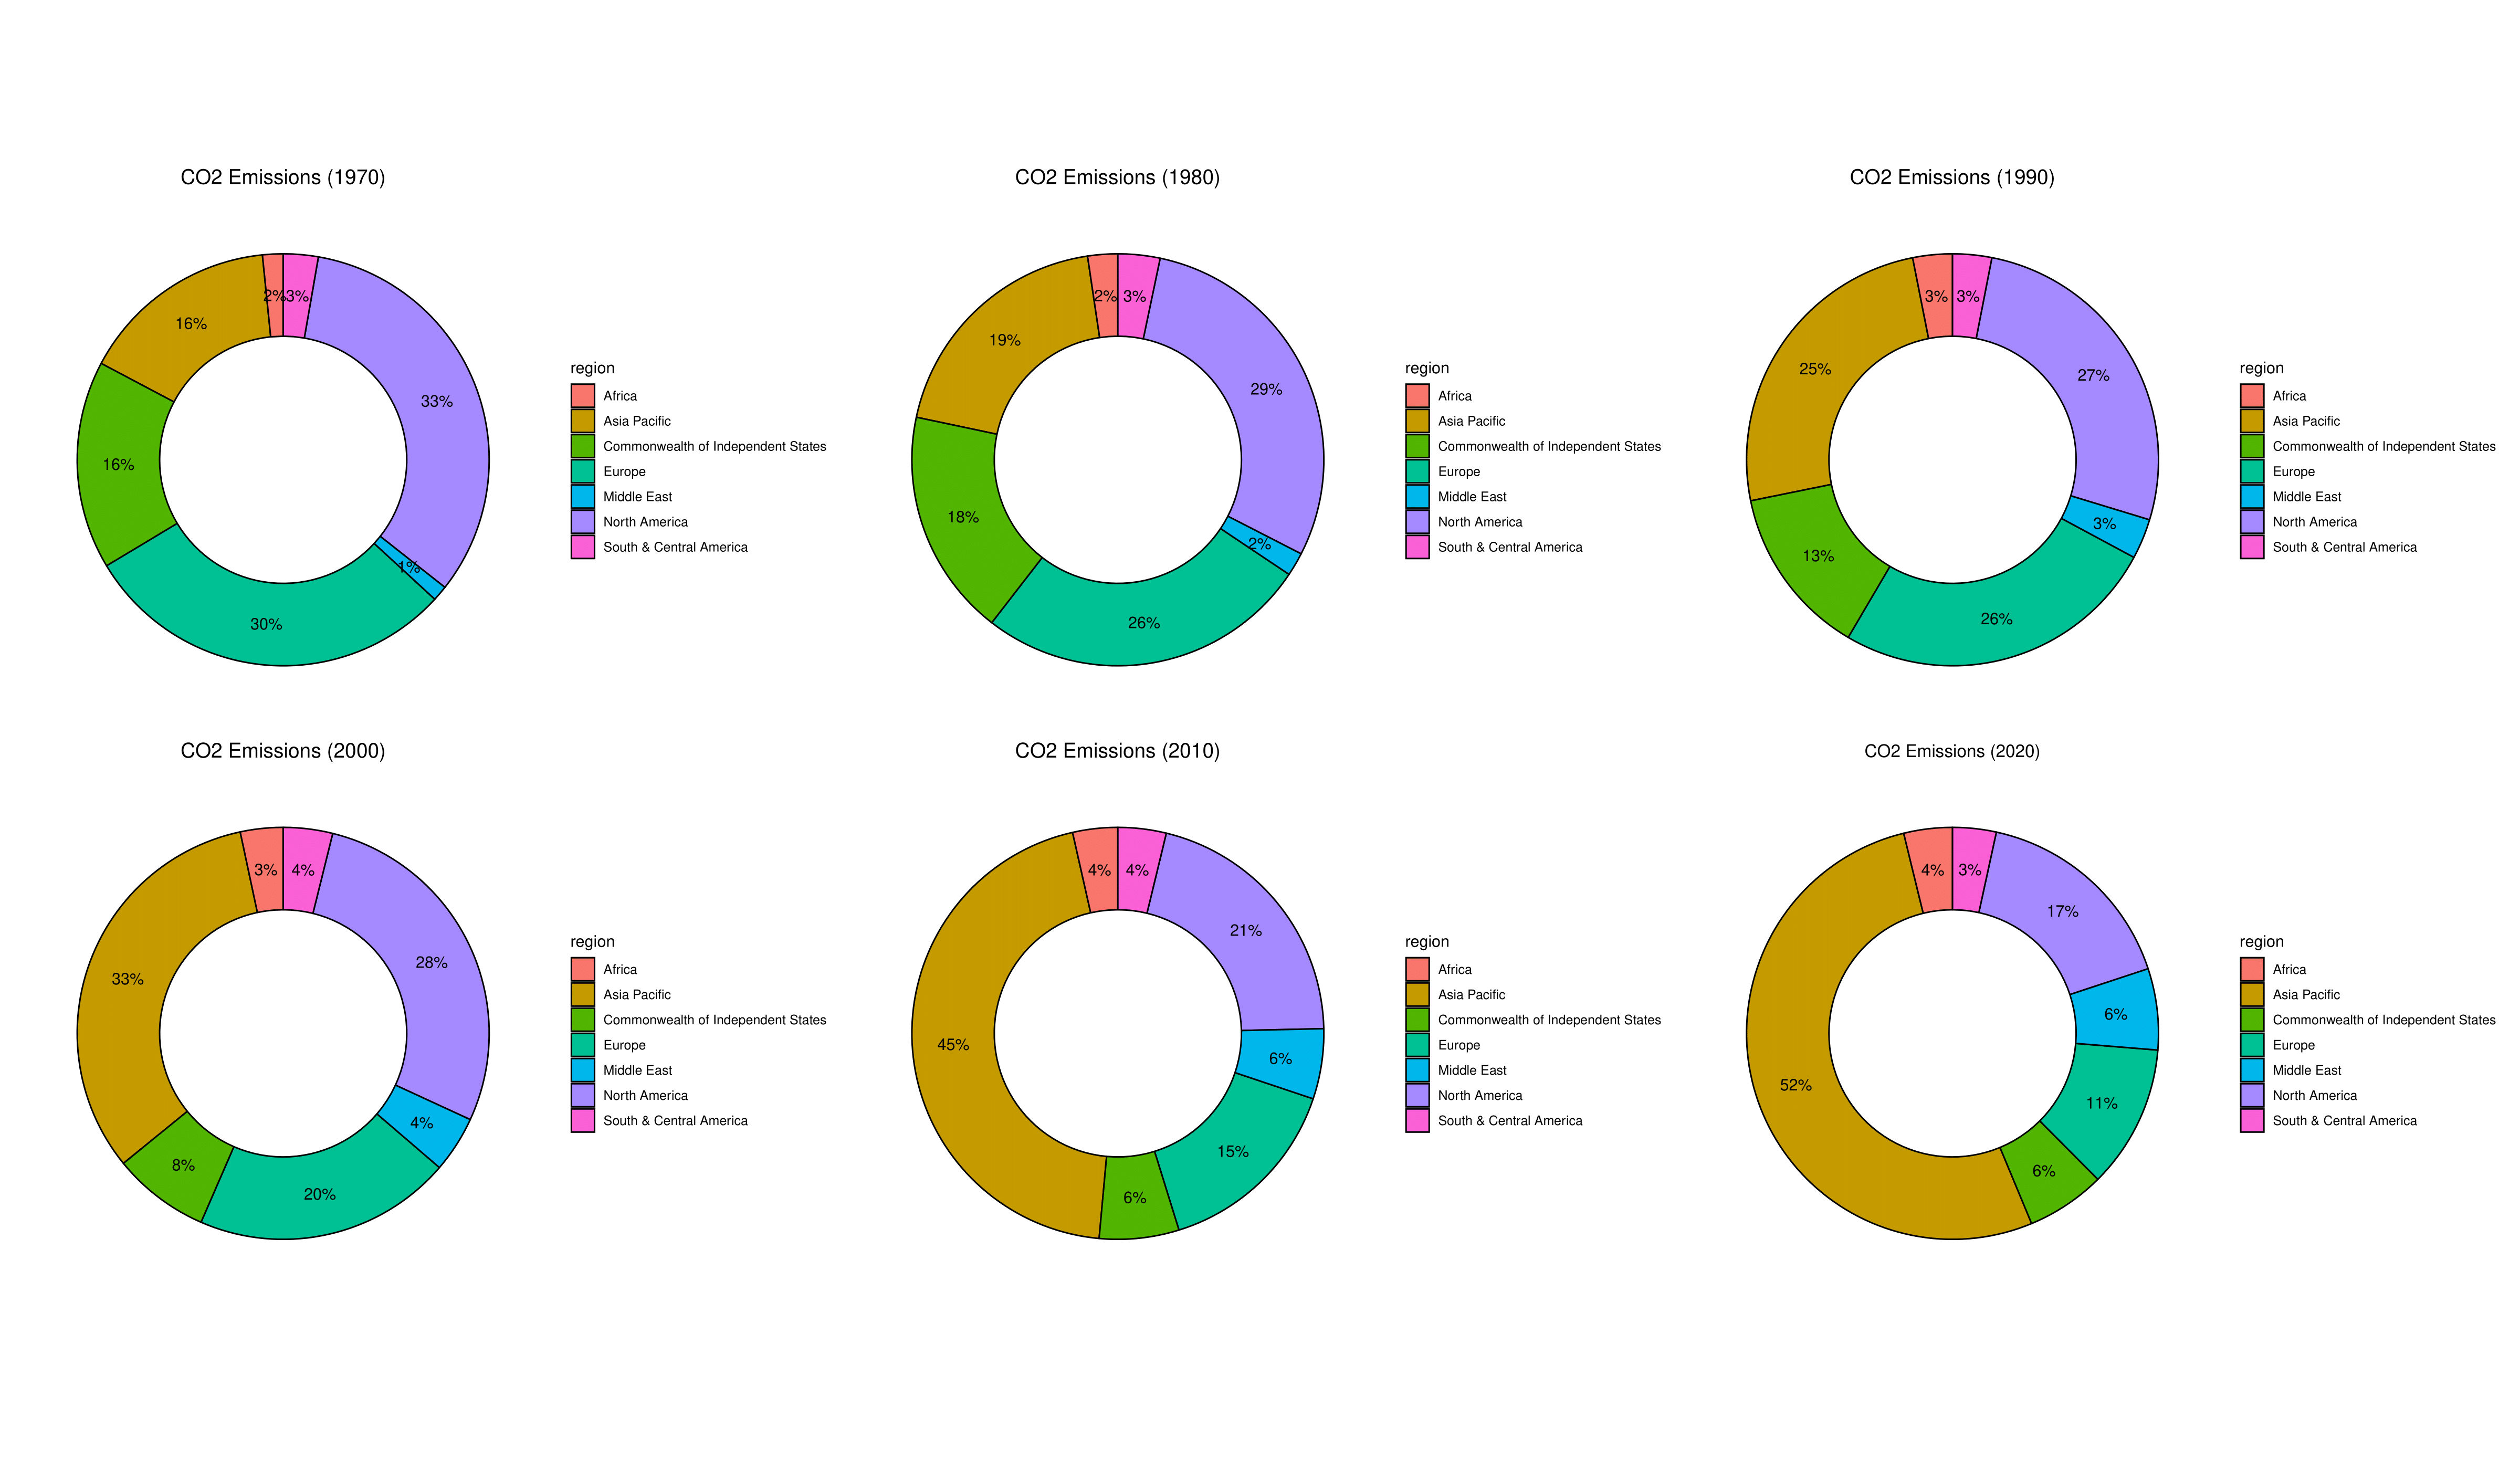

## Air Quality

### Air Quality_ Mean Population Exposure to PM2.5

In [462]:
d <- read.csv(paste0(path, 'Air Quality_ Mean Population Exposure to PM2.5.csv'))
dim(d)
head(d, 2)

[1] 2676    9

,Country,Subnational_Regions,Data_Units,Y2015,Y2016,Y2017,Y2018,Y2019,ObjectId
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,Czech Republic,Northwest,Micrograms/m3,15.8,15.2,14.8,15.1,14.9,1
2,Czech Republic,Northeast,Micrograms/m3,17.1,15.9,16.2,16.2,15.9,2


In [463]:
d <- d[-which(is.na(d$Y2019)),]
a <- aggregate(d[,8], list(d$Country), mean)[-1,]
an <- a[order(a$x, decreasing=TRUE),]
colnames(an) <- c('Country','Air_Quality')

In [574]:
library(png)
p1 <- readPNG("/home/shiyu/Pictures/1.png")
p2 <- readPNG("/home/shiyu/Pictures/2.png")
p3 <- readPNG("/home/shiyu/Pictures/3.png")
p4 <- readPNG("/home/shiyu/Pictures/4.png")
p5 <- readPNG("/home/shiyu/Pictures/5.png")
p6 <- readPNG("/home/shiyu/Pictures/6.png")
p7 <- readPNG("/home/shiyu/Pictures/7.png")
p8 <- readPNG("/home/shiyu/Pictures/8.png")
p9 <- readPNG("/home/shiyu/Pictures/9.png")
p10 <- readPNG("/home/shiyu/Pictures/10.png")

In [826]:
p11 <- readPNG("/home/shiyu/Pictures/p11.png")
p12 <- readPNG("/home/shiyu/Pictures/p12.png")
p13 <- readPNG("/home/shiyu/Pictures/p13.png")
p14 <- readPNG("/home/shiyu/Pictures/p14.png")
p15 <- readPNG("/home/shiyu/Pictures/p15.png")
p16 <- readPNG("/home/shiyu/Pictures/p16.png")
p17 <- readPNG("/home/shiyu/Pictures/p17.png")
p18 <- readPNG("/home/shiyu/Pictures/p18.png")
p19 <- readPNG("/home/shiyu/Pictures/p19.png")
p20 <- readPNG("/home/shiyu/Pictures/p20.png")

In [862]:
pdf(paste0(fig_path, 'Air Quality.PDF'), 
    width = 16, height = 16)
par(mfrow=c(2,1))
xlim <- c(-0.1, range(an[211:220,][,2])[2]+3)
cols <- c('#bebada','#fb8072','#80b1d3','#fdb462','#b3de69',
          '#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f')
barplot(an[211:220,][,2], horiz=TRUE, col=cols, cex.lab=1.2, 
        xlim=xlim, ylim=c(-1.5,12), axes=FALSE)
text(seq(0,6,by=2), -0.4, seq(0,6,by=2))
text(4.7, -1.2, 'Mean Population Exposure to PM2.5', cex=1.2)
abline(h=0, col=grey(0.2,0.9))
rasterImage(p20, 0, 11, 0.7, 12)
rasterImage(p19, 0, 9.8, 0.7, 10.8)
rasterImage(p18, 0, 8.6, 0.7, 9.6)
rasterImage(p17, 0, 7.4, 0.7, 8.4)
rasterImage(p16, 0, 6.2, 0.7, 7.2)
rasterImage(p15, 0, 5, 0.7, 6) 
rasterImage(p14, 0, 3.8, 0.7, 4.8)
rasterImage(p13, 0, 2.6, 0.7, 3.6)
rasterImage(p12, 0, 1.4, 0.7, 2.4)
rasterImage(p11, 0, 0.2, 0.7, 1.2) 
title(main='Air Quality (Highly)')
legend(6.8, 5.4, rev(an[211:220,][,1]), box.col=grey(0.2,0.8), box.lwd=0.6, 
       lty=1, lwd=6, col=rev(cols))


xlim <- c(-0.8, range(an[1:10,][,2])[2]+30)
cols <- c('#bebada','#fb8072','#80b1d3','#fdb462','#b3de69',
          '#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f')
barplot(rev(an[1:10,][,2]), horiz=TRUE, col=rev(cols), cex.lab=1.2,
        axes=FALSE, xlim=xlim, ylim=c(-1.5,12))
text(seq(0,80,by=20), -0.4, seq(0,80,by=20))
text(55, -1.2, 'Mean Population Exposure to PM2.5', cex=1.2)
abline(h=0, col=grey(0.2,0.9))

rasterImage(p1, 0, 11, 8, 12)
rasterImage(p2, 0, 9.8, 8, 10.8)
rasterImage(p3, 0, 8.6, 8, 9.6)
rasterImage(p4, 0, 7.4, 8, 8.4)
rasterImage(p5, 0, 6.2, 8, 7.2)
rasterImage(p6, 0, 5, 8, 6) 
rasterImage(p7, 0, 3.8, 8, 4.8)
rasterImage(p8, 0, 2.6, 8, 3.6)
rasterImage(p9, 0, 1.4, 8, 2.4)
rasterImage(p10, 0, 0.2, 8, 1.2) 
title(main='Air Quality (Lowly)')
legend(82, 5.4, an[1:10,][,1], box.col=grey(0.2,0.8), box.lwd=0.6, 
       lty=1, lwd=6, col=cols)
dev.off()

png 
  2

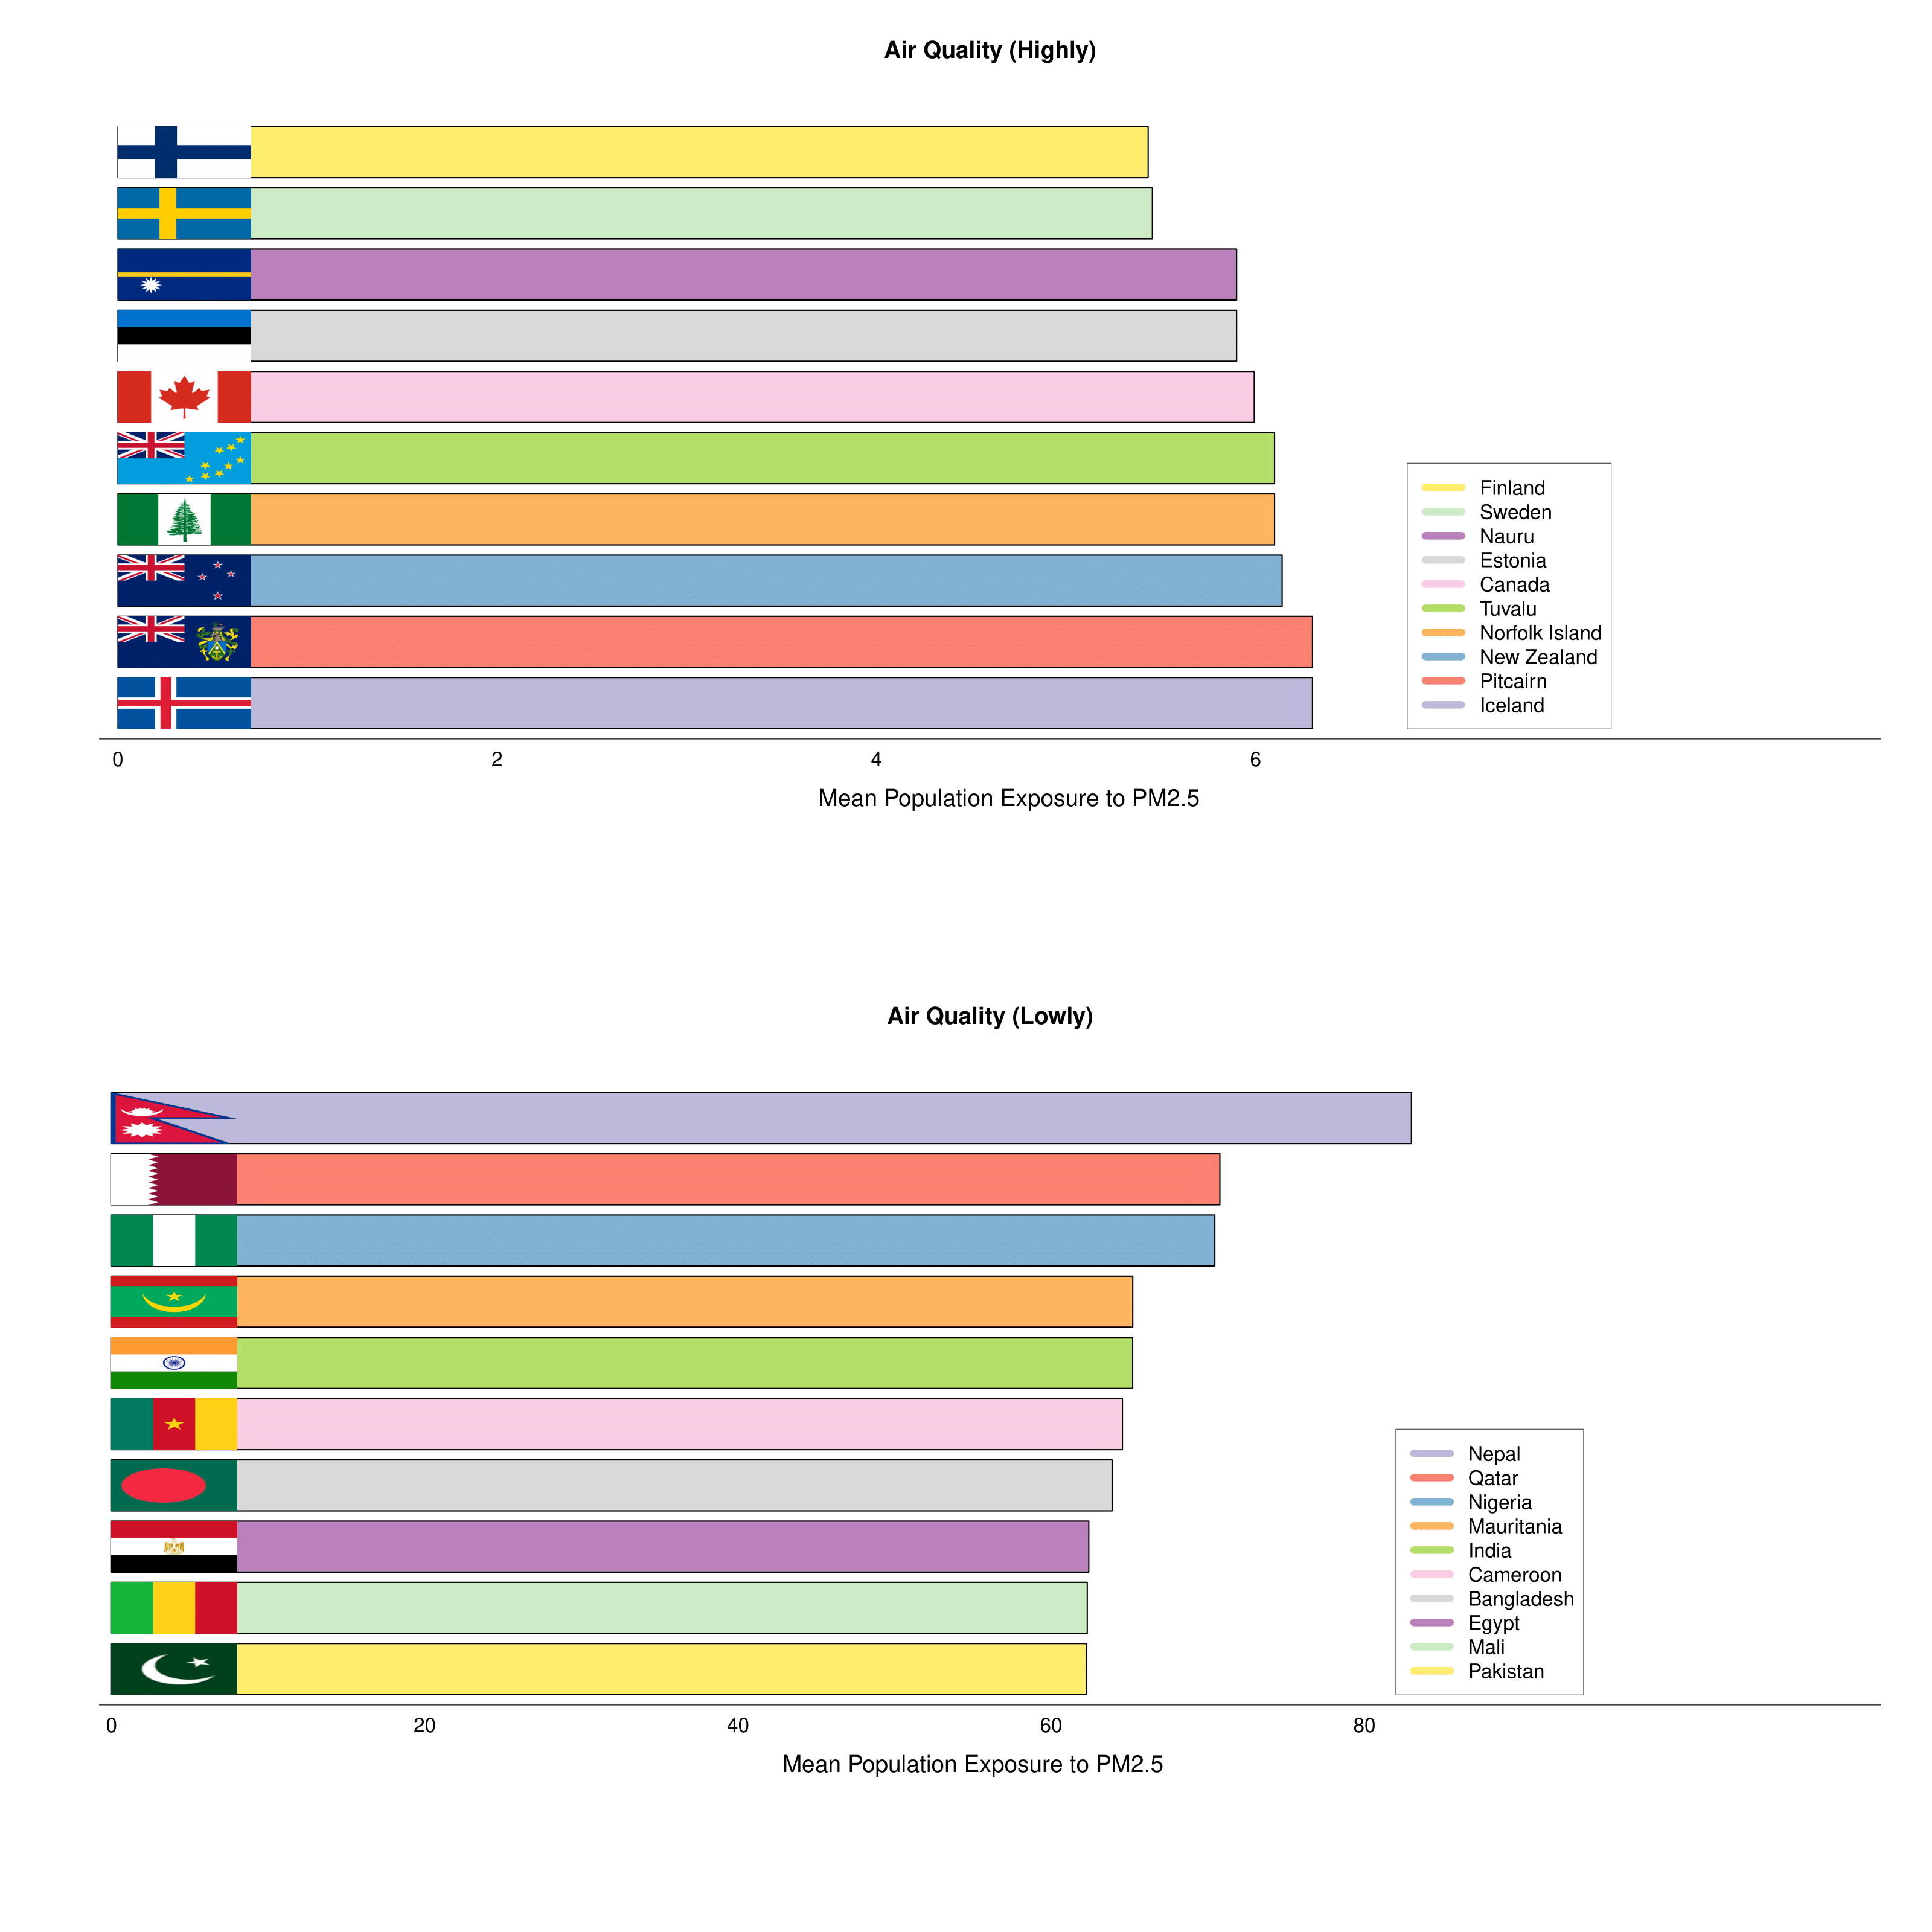

## Access to energy

### Renewable energy consumption (_ of total final energy consumption)

In [890]:
d <- as.data.frame(readxl::read_excel(paste0(path, 'Access to energy/a.xlsx')))
d <- d[-which(is.na(d[,2])),]
dim(d)
head(d,3)

[1] 213   2

,Country Name,2019
,<chr>,<dbl>
1,Aruba,7.48
3,Afghanistan,18.51
5,Angola,54.69


In [898]:
pdf(paste0(fig_path, 'Renewable Energy Consumption (2019).PDF'), 
    width = 16, height = 8)
map <- joinCountryData2Map(d, joinCode = "NAME", nameJoinColumn = "Country Name")
mapCountryData(map, nameColumnToPlot="2019", 
               colourPalette = 'topo',
               mapTitle='Renewable Energy Consumption (2019)',
               missingCountryCol=grey(0.5,0.1))
dev.off()

203 codes from your data successfully matched countries in the map
10 codes from your data failed to match with a country code in the map
40 codes from the map weren't represented in your data


png 
  2

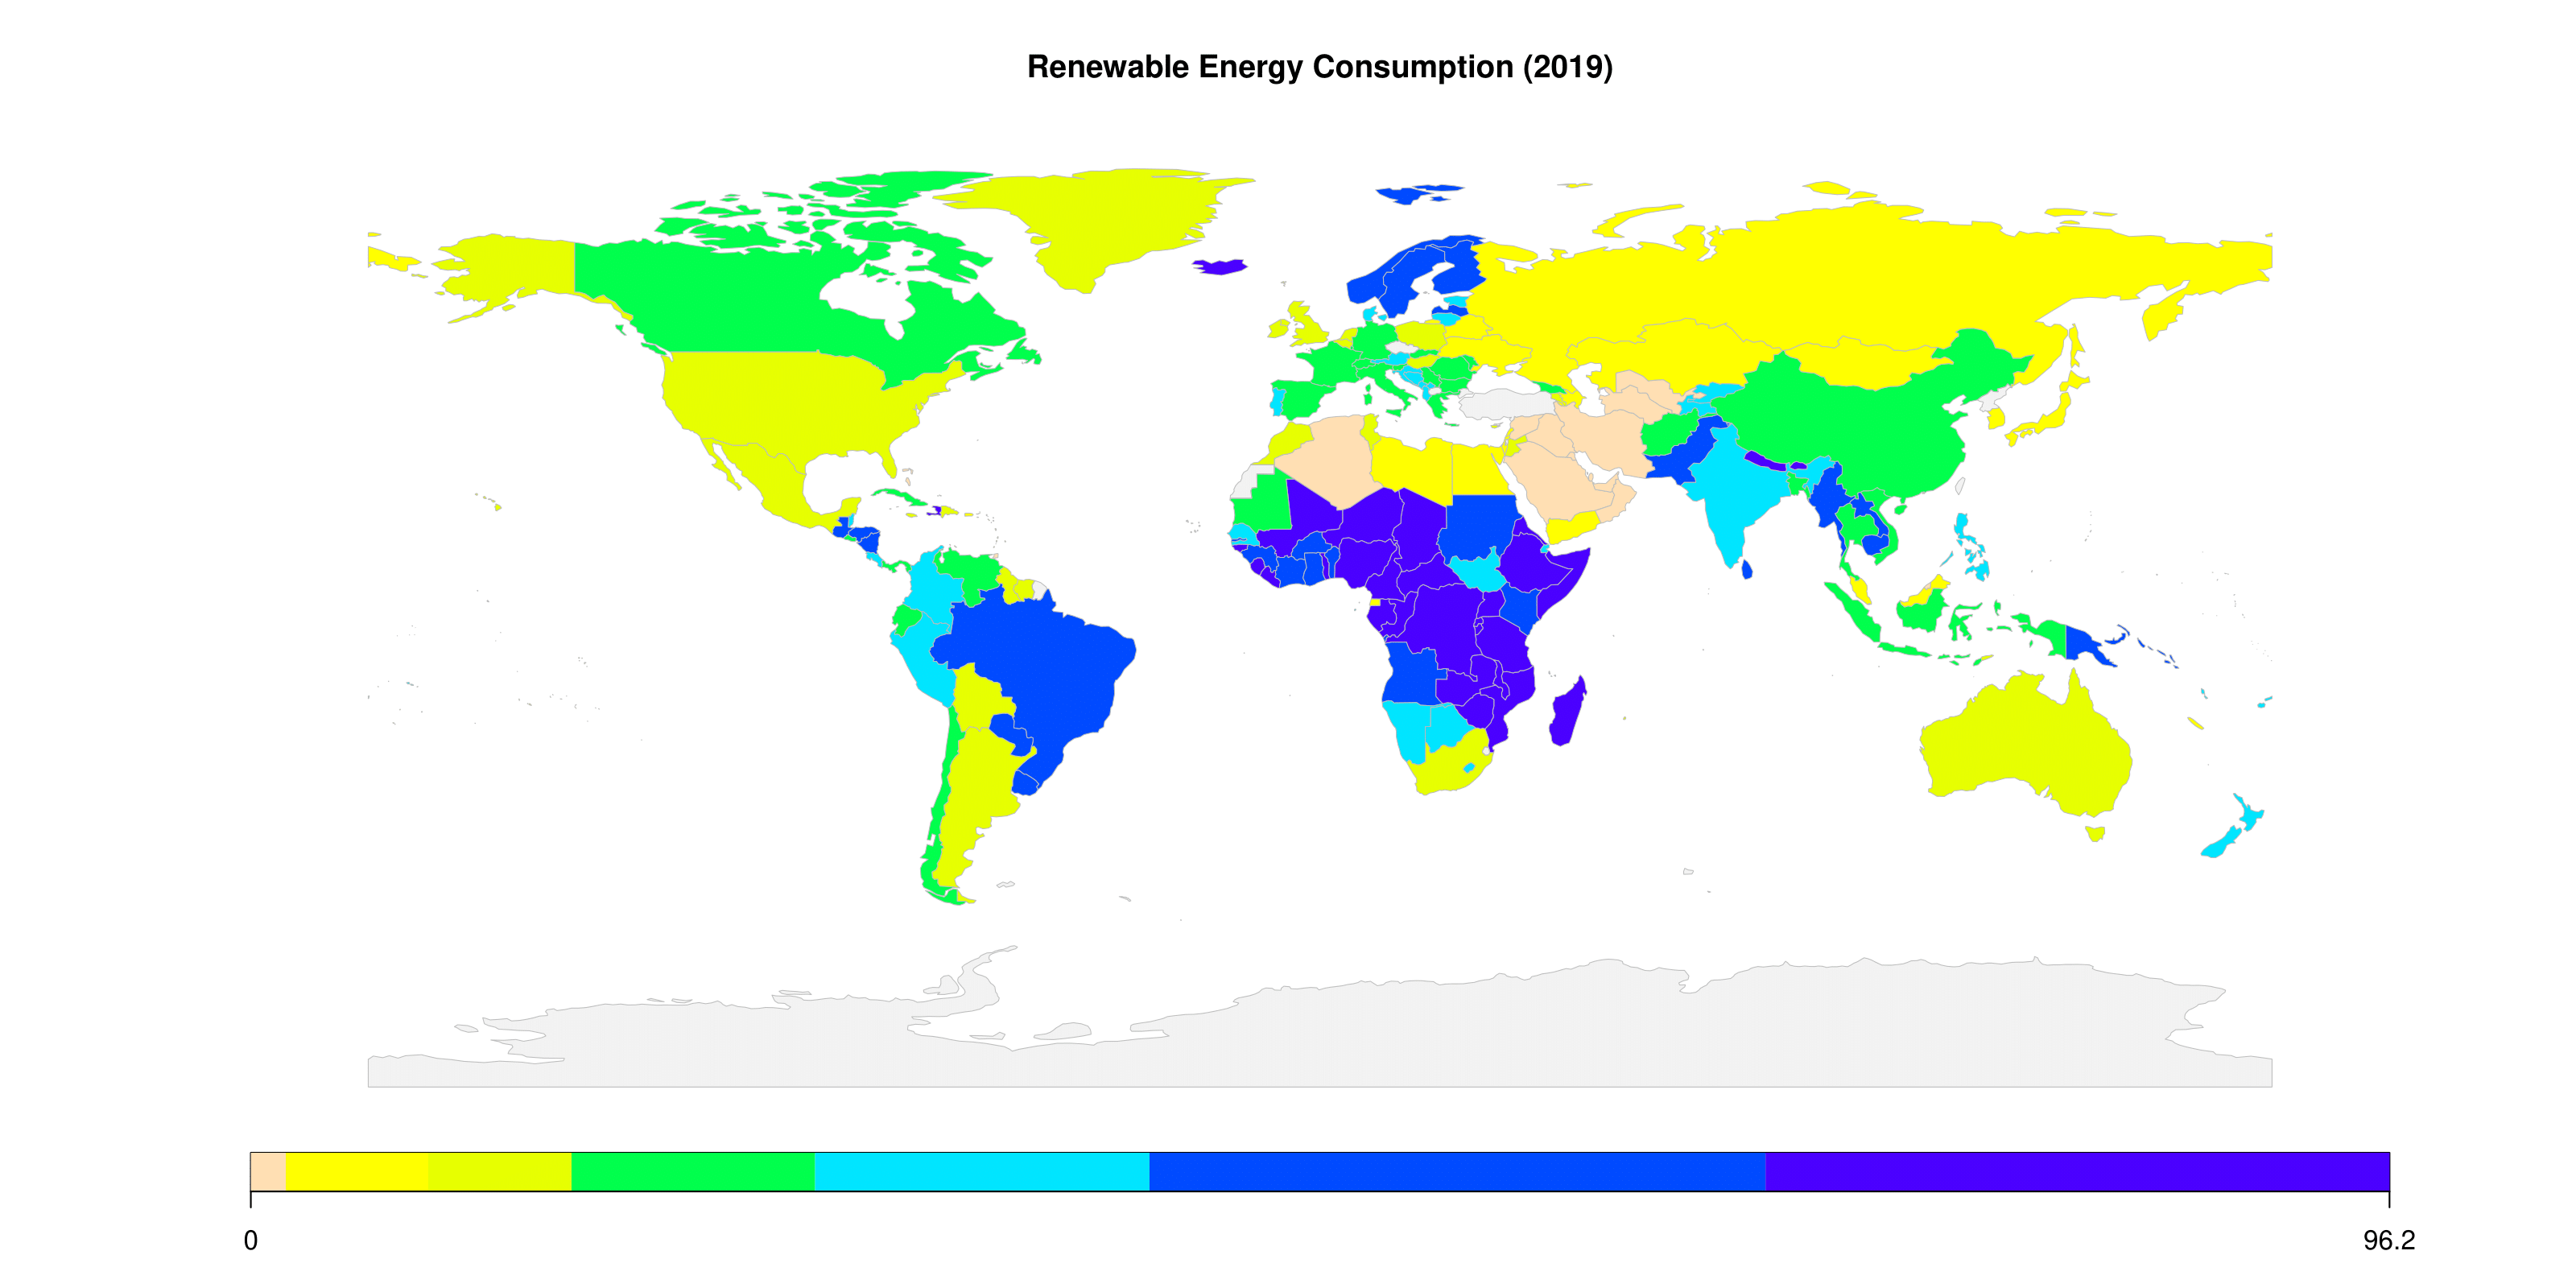

### Access to electricity (_ of population)

In [937]:
d <- as.data.frame(readxl::read_excel(paste0(path, 
    'Access to energy/Access to electricity .xlsx')))
d <- d[-which(is.na(d[,2])),]
dim(d)
head(d,3)

[1] 263   2

,Country Name,2020
,<chr>,<dbl>
1,Aruba,100.00000
2,Africa Eastern and Southern,45.80349
3,Afghanistan,97.70000


In [1133]:
# selecting countries which accessing to electricity below 20% of population
db20 <- d[order(d[,2]),][1:8,]
colnames(db20)[1] <- 'Country'

### Energy use (kg of oil equivalent per capita)

In [1136]:
d <- as.data.frame(readxl::read_excel(paste0(path, 
    'Access to energy/Energy use.xlsx')))
d <- d[-which(is.na(d[,2])),]
dim(d)
head(d,3)

[1] 179   2

,Country Name,2014
,<chr>,<dbl>
2,Africa Eastern and Southern,740.7663
4,Africa Western and Central,611.4374
5,Angola,544.6094


In [1140]:
db14 <- d[order(d[,2]),][1:8,]
colnames(db14)[1] <- 'Country'
db14

,Country,2014
,<chr>,<dbl>
217,South Sudan,66.3420
174,Niger,150.0137
21,Bangladesh,229.2505
70,Eritrea,245.9196
208,Senegal,279.2104
84,Ghana,331.8271
43,Cameroon,335.2016
235,Tajikistan,339.8524


In [1245]:
pdf(paste0(fig_path, 'Access to Electricity & oil energy use.PDF'), 
    width = 16, height = 12)
par(mfrow=c(2,1))
plot.new()
ylim <- c(range(db20[,2])[1]-2, range(db20[,2])[2]+2)
plot.window(xlim=c(-0.08,8), ylim=ylim)
lines(db20[,2], type='h', col=cols, lwd=20)
points(1:8, db20[,2], cex=5, col=cols, pch=23, bg=cols)
text(-0.1, seq(6,20,by=4), seq(6,20,by=4))
abline(h = 4.6, col=grey(0.2,0.9))
abline(v = 0, col=grey(0.2,0.9))
title(main='Access to Electricity (2020)')
mtext('-- countries which access below 20% of population', cex=1.1)
mtext('Countries', side=1, line=0.5)
mtext('Access to Electricity (% of population)', side=2, line=-1.8)
legend(0.05, 21.6, db20[,1], box.lwd=0, 
       lty=1, lwd=5, col=cols, ncol=2, x.intersp=0.5, text.width=1.1)


plot.new()
ylim <- c(range(db14[,2])[1]-26, range(db14[,2])[2]+26)
plot.window(xlim=c(-0.18,8), ylim=ylim)
lines(db14[,2], type='h', col=cols, lwd=20)
points(1:8, db14[,2], cex=5, col=cols, pch=24, bg=cols)
text(-0.12, seq(60,340, by=40), seq(60,340, by=40))
abline(h = 28.1, col=grey(0.2,0.9))
abline(v = 0, col=grey(0.2,0.9))
title(main='Energy use (2014)')
mtext('-- countries with least oil energy use', cex=1.1)
mtext('Countries', side=1, line=0.5)
mtext('Energy use (kg of oil equivalent per capita)', side=2, line=-2)
legend(0.05, 370, db14[,1], box.lwd=0, 
       lty=1, lwd=5, col=cols, ncol=2, x.intersp=0.5, text.width=0.53)
dev.off()

png 
  2

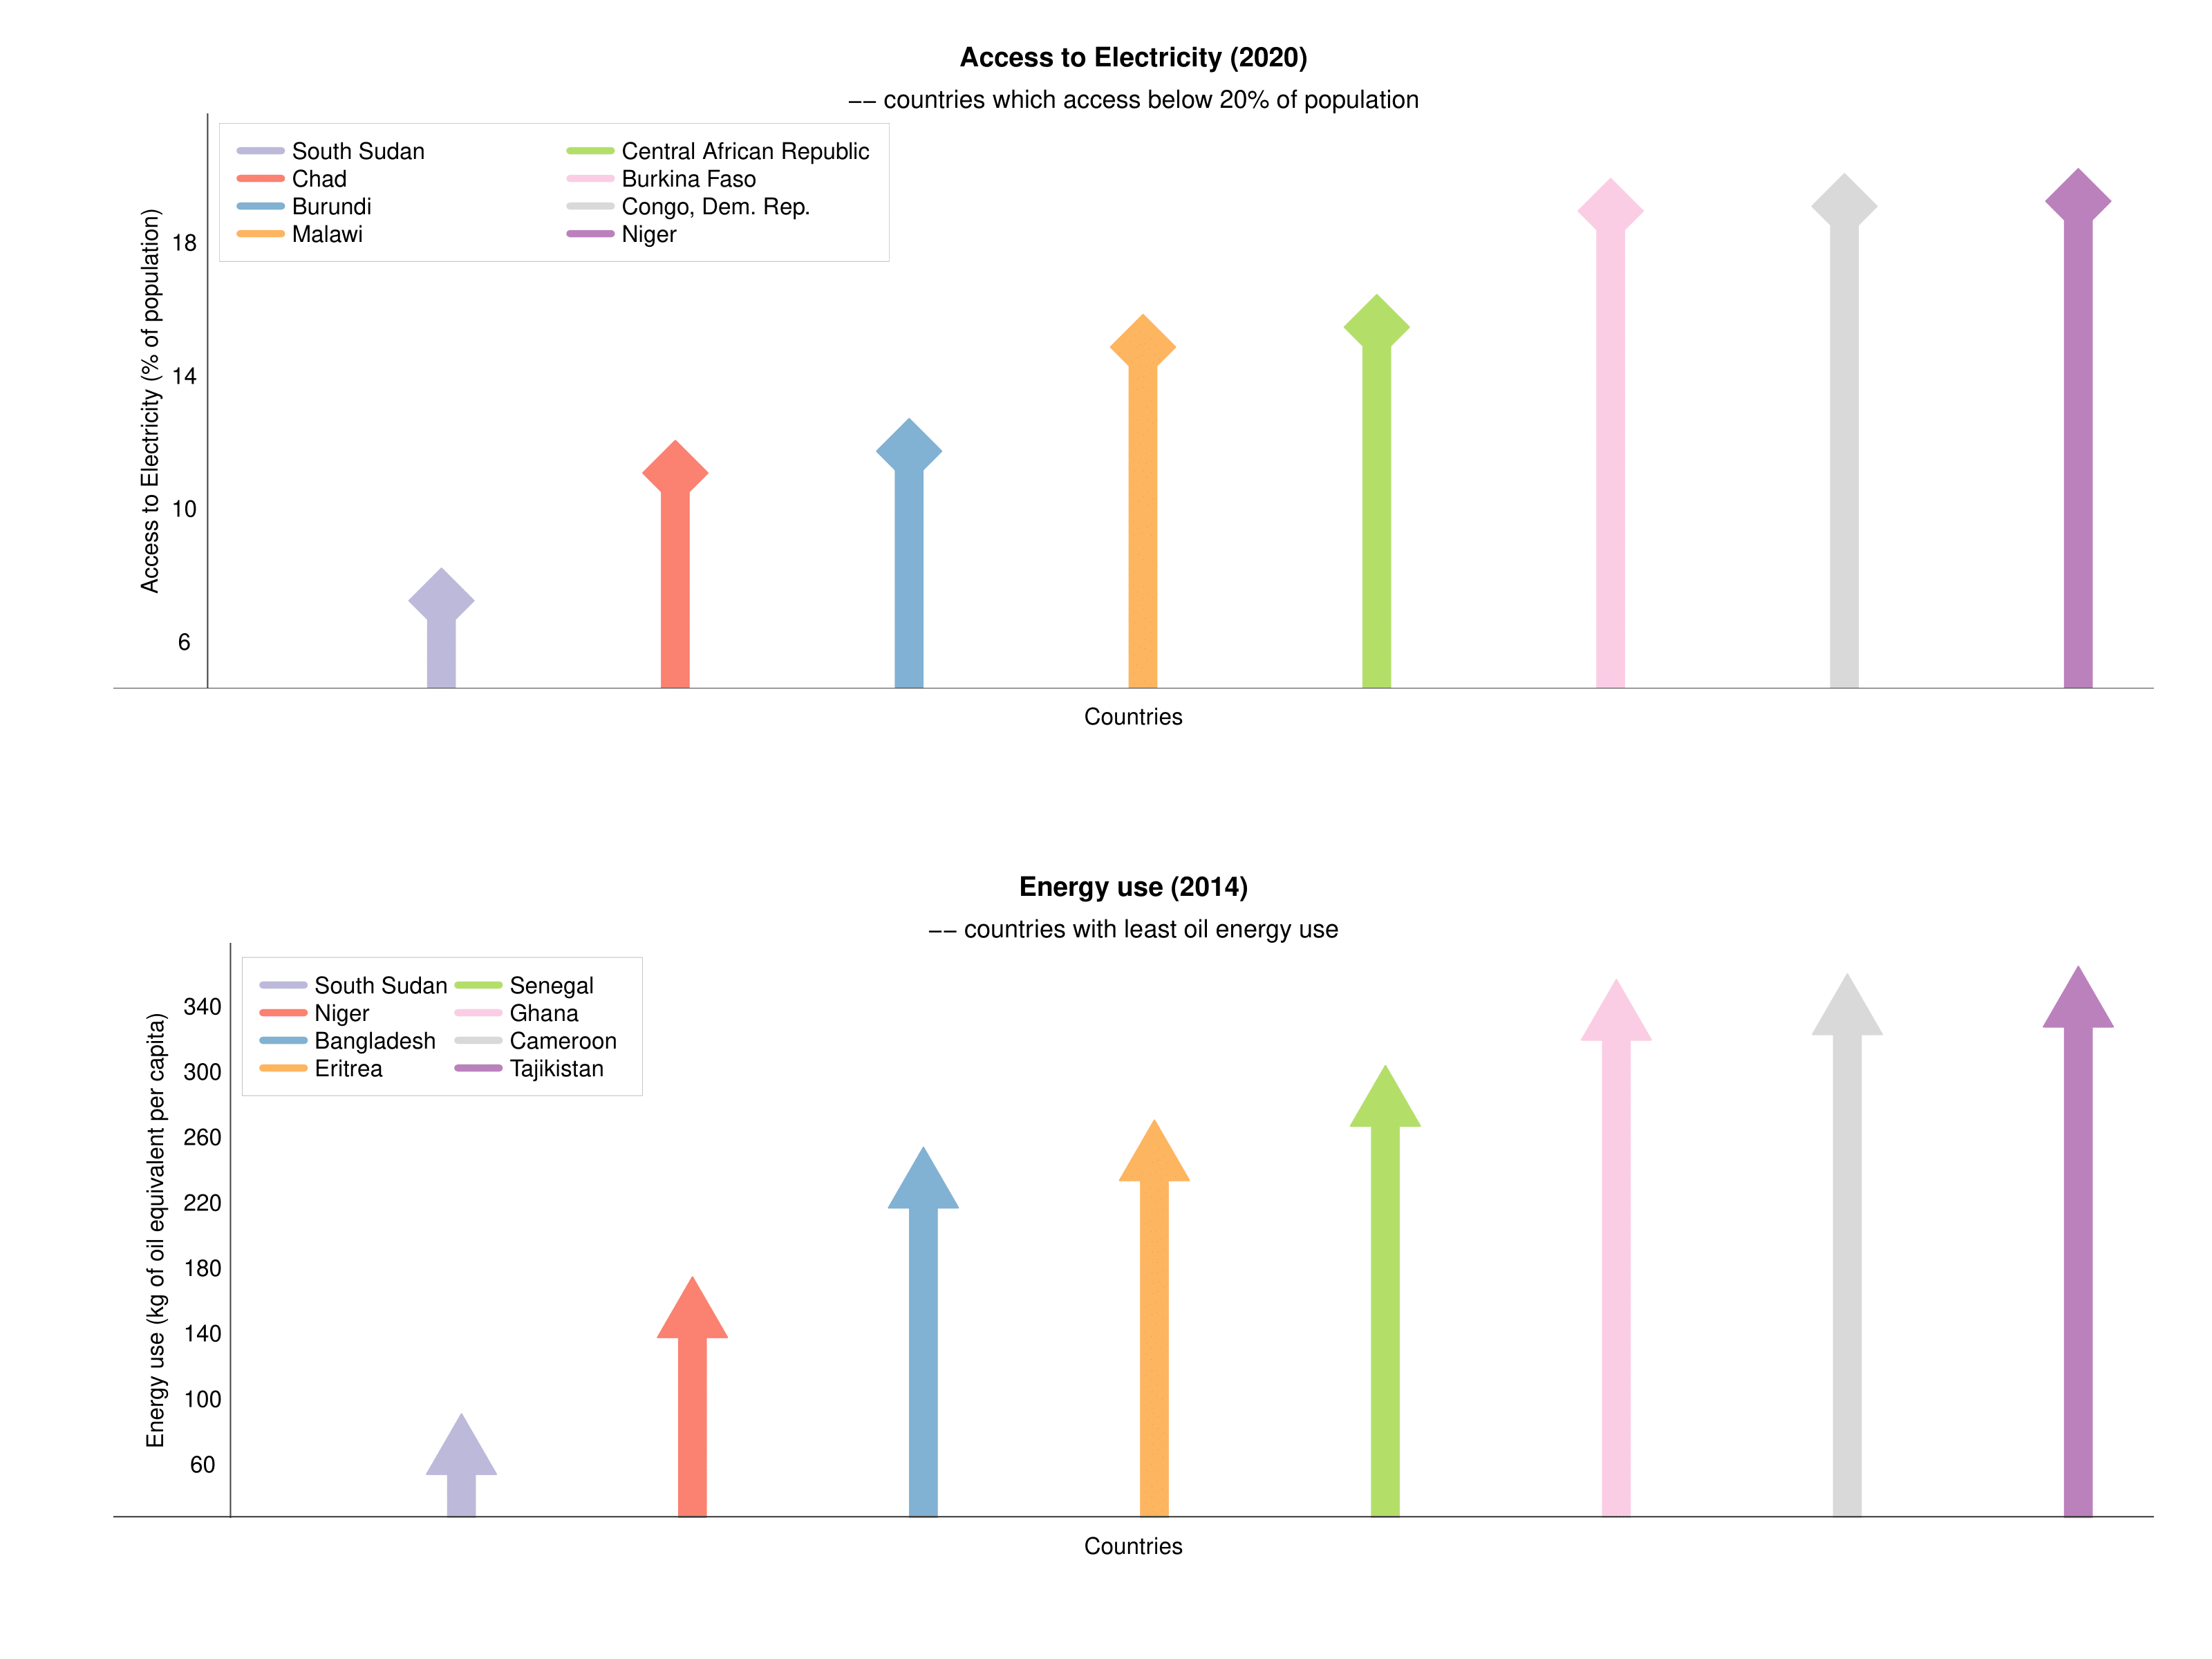